# 1. Data Preparatioin

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1.1 Loading Data

In [14]:
#Build google connection
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/'My Drive'/UCI-electricity.zip .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#Unzip the File
!unzip -q -o UCI-electricity.zip
!rm UCI-electricity.zip
!ls

drive  __MACOSX  sample_data  UCI-electricity


In [16]:
#Read UCI_data
data = pd.read_csv("UCI-electricity/UCI_data.csv",delimiter=',')

In [17]:
data.head()

date         T1       RH_1         T2       RH_2         T3  \
0  2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.230000   
1  2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.890000   
2  2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.600000   
3  2016-01-22 15:30:00  18.290000  38.900000  17.290000  39.260000  18.390000   
4  2016-02-10 00:40:00  22.290000  42.333333  21.600000  40.433333  22.666667   

        RH_3         T4       RH_4         T5  ...   RH_9  T_out  Press_mm_hg  \
0  37.030000  22.318571  36.610000  20.633333  ...  33.90   9.70   766.100000   
1  37.663333  18.700000  36.260000  18.463333  ...  41.09   0.30   740.333333   
2  36.290000  21.000000  34.826667  18.100000  ...  38.76   4.40   768.466667   
3  39.326667  16.100000  38.790000  16.100000  ...  39.20   3.35   760.600000   
4  43.363333  19.100000  40.900000  19.290000  ...  43.73   3.20   738.900000   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0    65.5   3.500000   40.000000   3.350000  24.061869  24.061869   
1    99.0   1.000000   41.333333   0.100000   4.622052   4.622052   
2    72.0   6.000000   22.666667  -0.266667   5.635898   5.635898   
3    82.0   5.500000   41.000000   0.500000  49.216445  49.216445   
4    88.0   7.333333   56.000000   1.400000  47.617579  47.617579   

   TARGET_energy  
0             60  
1             50  
2             80  
3             40  
4             60  

[5 rows x 28 columns]

In [18]:
data.describe()

T1          RH_1            T2          RH_2            T3  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     40.259739     20.341219     40.420420     22.267611   
std        1.606066      3.979299      2.192974      4.069813      2.006111   
min       16.790000     27.023333     16.100000     20.463333     17.200000   
25%       20.760000     37.333333     18.790000     37.900000     20.790000   
50%       21.600000     39.656667     20.000000     40.500000     22.100000   
75%       22.600000     43.066667     21.500000     43.260000     23.290000   
max       26.260000     63.360000     29.856667     56.026667     29.236000   

               RH_3            T4          RH_4            T5          RH_5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      39.242500     20.855335     39.026904     19.592106     50.949283   
std        3.254576      2.042884      4.341321      1.844623      9.022034   
min       28.766667     15.100000     27.660000     15.330000     29.815000   
25%       36.900000     19.530000     35.530000     18.277500     45.400000   
50%       38.530000     20.666667     38.400000     19.390000     49.090000   
75%       41.760000     22.100000     42.156667     20.619643     53.663333   
max       50.163333     26.200000     51.090000     25.795000     96.321667   

       ...          RH_9         T_out   Press_mm_hg        RH_out  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     41.552401      7.411665    755.522602     79.750418   
std    ...      4.151497      5.317409      7.399441     14.901088   
min    ...     29.166667     -5.000000    729.300000     24.000000   
25%    ...     38.500000      3.666667    750.933333     70.333333   
50%    ...     40.900000      6.916667    756.100000     83.666667   
75%    ...     44.338095     10.408333    760.933333     91.666667   
max    ...     53.326667     26.100000    772.300000    100.000000   

          Windspeed    Visibility     Tdewpoint           rv1           rv2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       4.039752     38.330834      3.760707     24.988033     24.988033   
std        2.451221     11.794719      4.194648     14.496634     14.496634   
min        0.000000      1.000000     -6.600000      0.005322      0.005322   
25%        2.000000     29.000000      0.900000     12.497889     12.497889   
50%        3.666667     40.000000      3.433333     24.897653     24.897653   
75%        5.500000     40.000000      6.566667     37.583769     37.583769   
max       14.000000     66.000000     15.500000     49.996530     49.996530   

       TARGET_energy  
count   19735.000000  
mean      101.496833  
std       104.380829  
min        10.000000  
25%        50.000000  
50%        60.000000  
75%       100.000000  
max      1110.000000  

[8 rows x 27 columns]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19735 non-null  object 
 1   T1             19735 non-null  float64
 2   RH_1           19735 non-null  float64
 3   T2             19735 non-null  float64
 4   RH_2           19735 non-null  float64
 5   T3             19735 non-null  float64
 6   RH_3           19735 non-null  float64
 7   T4             19735 non-null  float64
 8   RH_4           19735 non-null  float64
 9   T5             19735 non-null  float64
 10  RH_5           19735 non-null  float64
 11  T6             19735 non-null  float64
 12  RH_6           19735 non-null  float64
 13  T7             19735 non-null  float64
 14  RH_7           19735 non-null  float64
 15  T8             19735 non-null  float64
 16  RH_8           19735 non-null  float64
 17  T9             19735 non-null  float64
 18  RH_9  

In [20]:
#Convert the data type from object to datetime
data['date'] = pd.to_datetime(data['date'])
#Re head
data.head()

date         T1       RH_1         T2       RH_2         T3  \
0 2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.230000   
1 2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.890000   
2 2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.600000   
3 2016-01-22 15:30:00  18.290000  38.900000  17.290000  39.260000  18.390000   
4 2016-02-10 00:40:00  22.290000  42.333333  21.600000  40.433333  22.666667   

        RH_3         T4       RH_4         T5  ...   RH_9  T_out  Press_mm_hg  \
0  37.030000  22.318571  36.610000  20.633333  ...  33.90   9.70   766.100000   
1  37.663333  18.700000  36.260000  18.463333  ...  41.09   0.30   740.333333   
2  36.290000  21.000000  34.826667  18.100000  ...  38.76   4.40   768.466667   
3  39.326667  16.100000  38.790000  16.100000  ...  39.20   3.35   760.600000   
4  43.363333  19.100000  40.900000  19.290000  ...  43.73   3.20   738.900000   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0    65.5   3.500000   40.000000   3.350000  24.061869  24.061869   
1    99.0   1.000000   41.333333   0.100000   4.622052   4.622052   
2    72.0   6.000000   22.666667  -0.266667   5.635898   5.635898   
3    82.0   5.500000   41.000000   0.500000  49.216445  49.216445   
4    88.0   7.333333   56.000000   1.400000  47.617579  47.617579   

   TARGET_energy  
0             60  
1             50  
2             80  
3             40  
4             60  

[5 rows x 28 columns]

In [21]:
data.shape

(19735, 28)

## 1.2 Cleaning  Data

In [22]:
#Missing value
data.isnull().sum()

date             0
T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
dtype: int64

In [23]:
#Checking any repeat rows which are meaningless.
data.duplicated().any()

False

In [24]:
#Checking the data again
data.describe()

date            T1          RH_1            T2  \
count                19735  19735.000000  19735.000000  19735.000000   
mean   2016-03-20 05:30:00     21.686571     40.259739     20.341219   
min    2016-01-11 17:00:00     16.790000     27.023333     16.100000   
25%    2016-02-14 23:15:00     20.760000     37.333333     18.790000   
50%    2016-03-20 05:30:00     21.600000     39.656667     20.000000   
75%    2016-04-23 11:45:00     22.600000     43.066667     21.500000   
max    2016-05-27 18:00:00     26.260000     63.360000     29.856667   
std                    NaN      1.606066      3.979299      2.192974   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   
std        4.069813      2.006111      3.254576      2.042884      4.341321   

                 T5  ...          RH_9         T_out   Press_mm_hg  \
count  19735.000000  ...  19735.000000  19735.000000  19735.000000   
mean      19.592106  ...     41.552401      7.411665    755.522602   
min       15.330000  ...     29.166667     -5.000000    729.300000   
25%       18.277500  ...     38.500000      3.666667    750.933333   
50%       19.390000  ...     40.900000      6.916667    756.100000   
75%       20.619643  ...     44.338095     10.408333    760.933333   
max       25.795000  ...     53.326667     26.100000    772.300000   
std        1.844623  ...      4.151497      5.317409      7.399441   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   
std       14.901088      2.451221     11.794719      4.194648     14.496634   

                rv2  TARGET_energy  
count  19735.000000   19735.000000  
mean      24.988033     101.496833  
min        0.005322      10.000000  
25%       12.497889      50.000000  
50%       24.897653      60.000000  
75%       37.583769     100.000000  
max       49.996530    1110.000000  
std       14.496634     104.380829  

[8 rows x 28 columns]

In [25]:
#Looking at the name of columns which can be used later.
data.columns

Index(['date', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'TARGET_energy'],
      dtype='object')

# 2. EDA Data Distribution

## 2.1 Data Encoding

In [14]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
data['LEdate']= labelEncoder.fit_transform(data['date'])

In [15]:
# Setting date as the index:
data.set_index('date', inplace=True)

## 2.2 Feature Addition

In [16]:
#creating new features as the time series data
data['yy'] = data.index.year #year
data['mm'] = data.index.month #month
data['weekday'] = data.index.dayofweek #dayofweek
data['dd'] = data.index.day # day
data['hh'] = data.index.hour #hour

data.head(10)

T1       RH_1         T2       RH_2         T3  \
date                                                                         
2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.230000   
2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.890000   
2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.600000   
2016-01-22 15:30:00  18.290000  38.900000  17.290000  39.260000  18.390000   
2016-02-10 00:40:00  22.290000  42.333333  21.600000  40.433333  22.666667   
2016-02-16 15:40:00  21.790000  34.730000  19.760000  35.400000  21.230000   
2016-02-13 01:50:00  21.200000  38.090000  19.166667  38.790000  20.890000   
2016-01-24 22:30:00  21.890000  41.730000  21.200000  40.933333  20.500000   
2016-03-23 10:20:00  21.760000  41.200000  19.390000  46.263333  22.100000   
2016-03-03 12:10:00  20.200000  38.400000  19.390000  37.567500  19.917500   

                          RH_3         T4       RH_4         T5       RH_5  \
date                                                                         
2016-04-19 20:30:00  37.030000  22.318571  36.610000  20.633333  62.166667   
2016-03-05 04:40:00  37.663333  18.700000  36.260000  18.463333  43.560000   
2016-03-14 12:40:00  36.290000  21.000000  34.826667  18.100000  46.126667   
2016-01-22 15:30:00  39.326667  16.100000  38.790000  16.100000  47.700000   
2016-02-10 00:40:00  43.363333  19.100000  40.900000  19.290000  50.745000   
2016-02-16 15:40:00  35.200000  20.100000  34.760000  19.033333  38.400000   
2016-02-13 01:50:00  39.530000  19.390000  39.590000  19.588889  70.750556   
2016-01-24 22:30:00  44.260000  18.426667  47.200000  18.791111  62.654444   
2016-03-23 10:20:00  38.230000  21.200000  39.156667  19.890000  48.590000   
2016-03-03 12:10:00  37.900000  21.832857  37.038571  18.000000  45.000000   

                     ...  Tdewpoint        rv1        rv2  TARGET_energy  \
date                 ...                                                   
2016-04-19 20:30:00  ...   3.350000  24.061869  24.061869             60   
2016-03-05 04:40:00  ...   0.100000   4.622052   4.622052             50   
2016-03-14 12:40:00  ...  -0.266667   5.635898   5.635898             80   
2016-01-22 15:30:00  ...   0.500000  49.216445  49.216445             40   
2016-02-10 00:40:00  ...   1.400000  47.617579  47.617579             60   
2016-02-16 15:40:00  ...  -4.333333  16.431218  16.431218             50   
2016-02-13 01:50:00  ...  -0.900000  33.547313  33.547313             60   
2016-01-24 22:30:00  ...   7.250000  15.230781  15.230781            400   
2016-03-23 10:20:00  ...   5.566667  41.004196  41.004196             80   
2016-03-03 12:10:00  ...   2.783333  28.804764  28.804764            100   

                     LEdate    yy  mm  weekday  dd  hh  
date                                                    
2016-04-19 20:30:00   14277  2016   4        1  19  20  
2016-03-05 04:40:00    7702  2016   3        5   5   4  
2016-03-14 12:40:00    9046  2016   3        0  14  12  
2016-01-22 15:30:00    1575  2016   1        4  22  15  
2016-02-10 00:40:00    4222  2016   2        2  10   0  
2016-02-16 15:40:00    5176  2016   2        1  16  15  
2016-02-13 01:50:00    4661  2016   2        5  13   1  
2016-01-24 22:30:00    1905  2016   1        6  24  22  
2016-03-23 10:20:00   10328  2016   3        2  23  10  
2016-03-03 12:10:00    7459  2016   3        3   3  12  

[10 rows x 33 columns]

## 2.3 Data Division

In [17]:
# Separating columns by their descriptions:
other_Data = [i for i in data.columns if ("T" not in i)&("RH" not in i)&("TARGET_energy" not in i)]
temp_Data = [i for i in data.columns if ("T" in i)&("TARGET_energy" not in i)]
humi_Data = [i for i in data.columns if "RH" in i]

In [18]:
#Foucus on temprature Data
data[temp_Data].describe(include='all')

T1            T2            T3            T4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.341219     22.267611     20.855335     19.592106   
std        1.606066      2.192974      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9         T_out  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.910939     20.267106     22.029107     19.485828      7.411665   
std        6.090347      2.109993      1.956162      2.014712      5.317409   
min       -6.065000     15.390000     16.306667     14.890000     -5.000000   
25%        3.626667     18.700000     20.790000     18.000000      3.666667   
50%        7.300000     20.033333     22.100000     19.390000      6.916667   
75%       11.256000     21.600000     23.390000     20.600000     10.408333   
max       28.290000     26.000000     27.230000     24.500000     26.100000   

          Tdewpoint  
count  19735.000000  
mean       3.760707  
std        4.194648  
min       -6.600000  
25%        0.900000  
50%        3.433333  
75%        6.566667  
max       15.500000

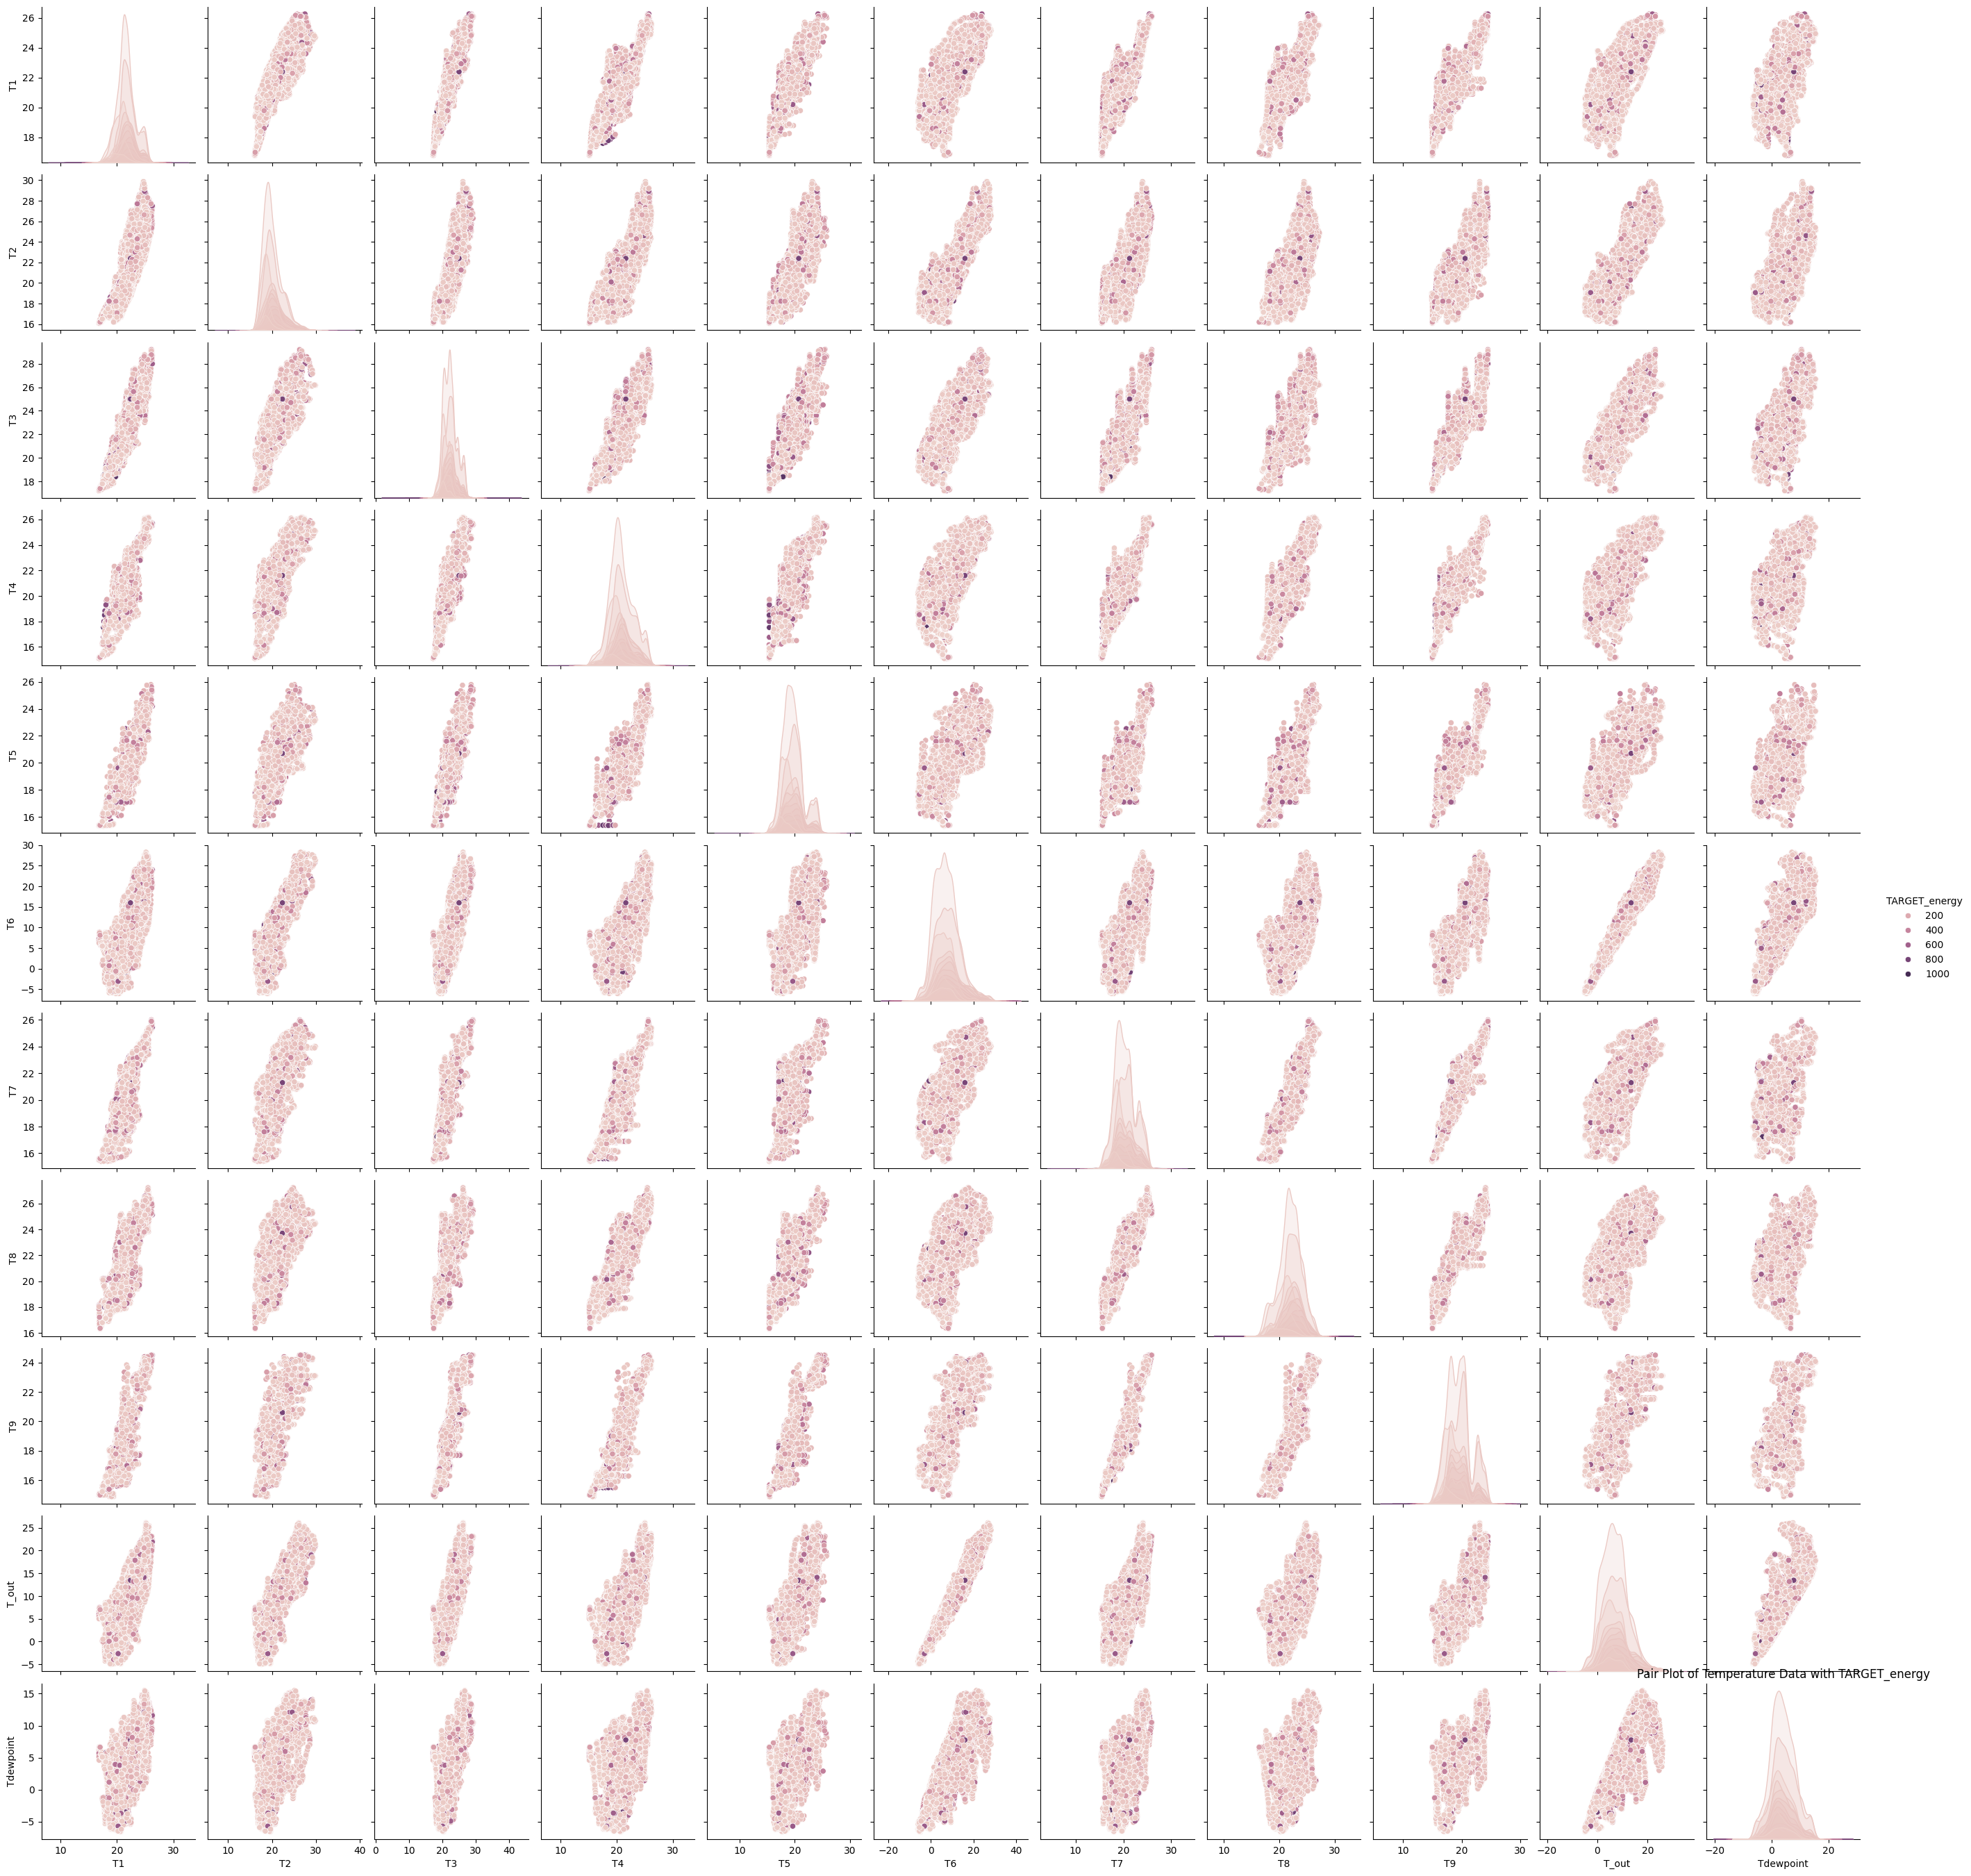

In [19]:
#Discovery the relationship between Taget and Temprature
temp_Data.append("TARGET_energy")
# temp_Data= df[temp_Data]
# Plot pairplot between temp_Data and TARGET_energy
sns.pairplot(data[temp_Data], hue='TARGET_energy')
plt.title('Pair Plot of Temperature Data with TARGET_energy')
plt.show()


In [20]:
#Same with Humidity data
data[humi_Data].describe()

RH_1          RH_2          RH_3          RH_4          RH_5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.259739     40.420420     39.242500     39.026904     50.949283   
std        3.979299      4.069813      3.254576      4.341321      9.022034   
min       27.023333     20.463333     28.766667     27.660000     29.815000   
25%       37.333333     37.900000     36.900000     35.530000     45.400000   
50%       39.656667     40.500000     38.530000     38.400000     49.090000   
75%       43.066667     43.260000     41.760000     42.156667     53.663333   
max       63.360000     56.026667     50.163333     51.090000     96.321667   

               RH_6          RH_7          RH_8          RH_9        RH_out  
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  
mean      54.609083     35.388200     42.936165     41.552401     79.750418  
std       31.149806      5.114208      5.224361      4.151497     14.901088  
min        1.000000     23.200000     29.600000     29.166667     24.000000  
25%       30.025000     31.500000     39.066667     38.500000     70.333333  
50%       55.290000     34.863333     42.375000     40.900000     83.666667  
75%       83.226667     39.000000     46.536000     44.338095     91.666667  
max       99.900000     51.400000     58.780000     53.326667    100.000000

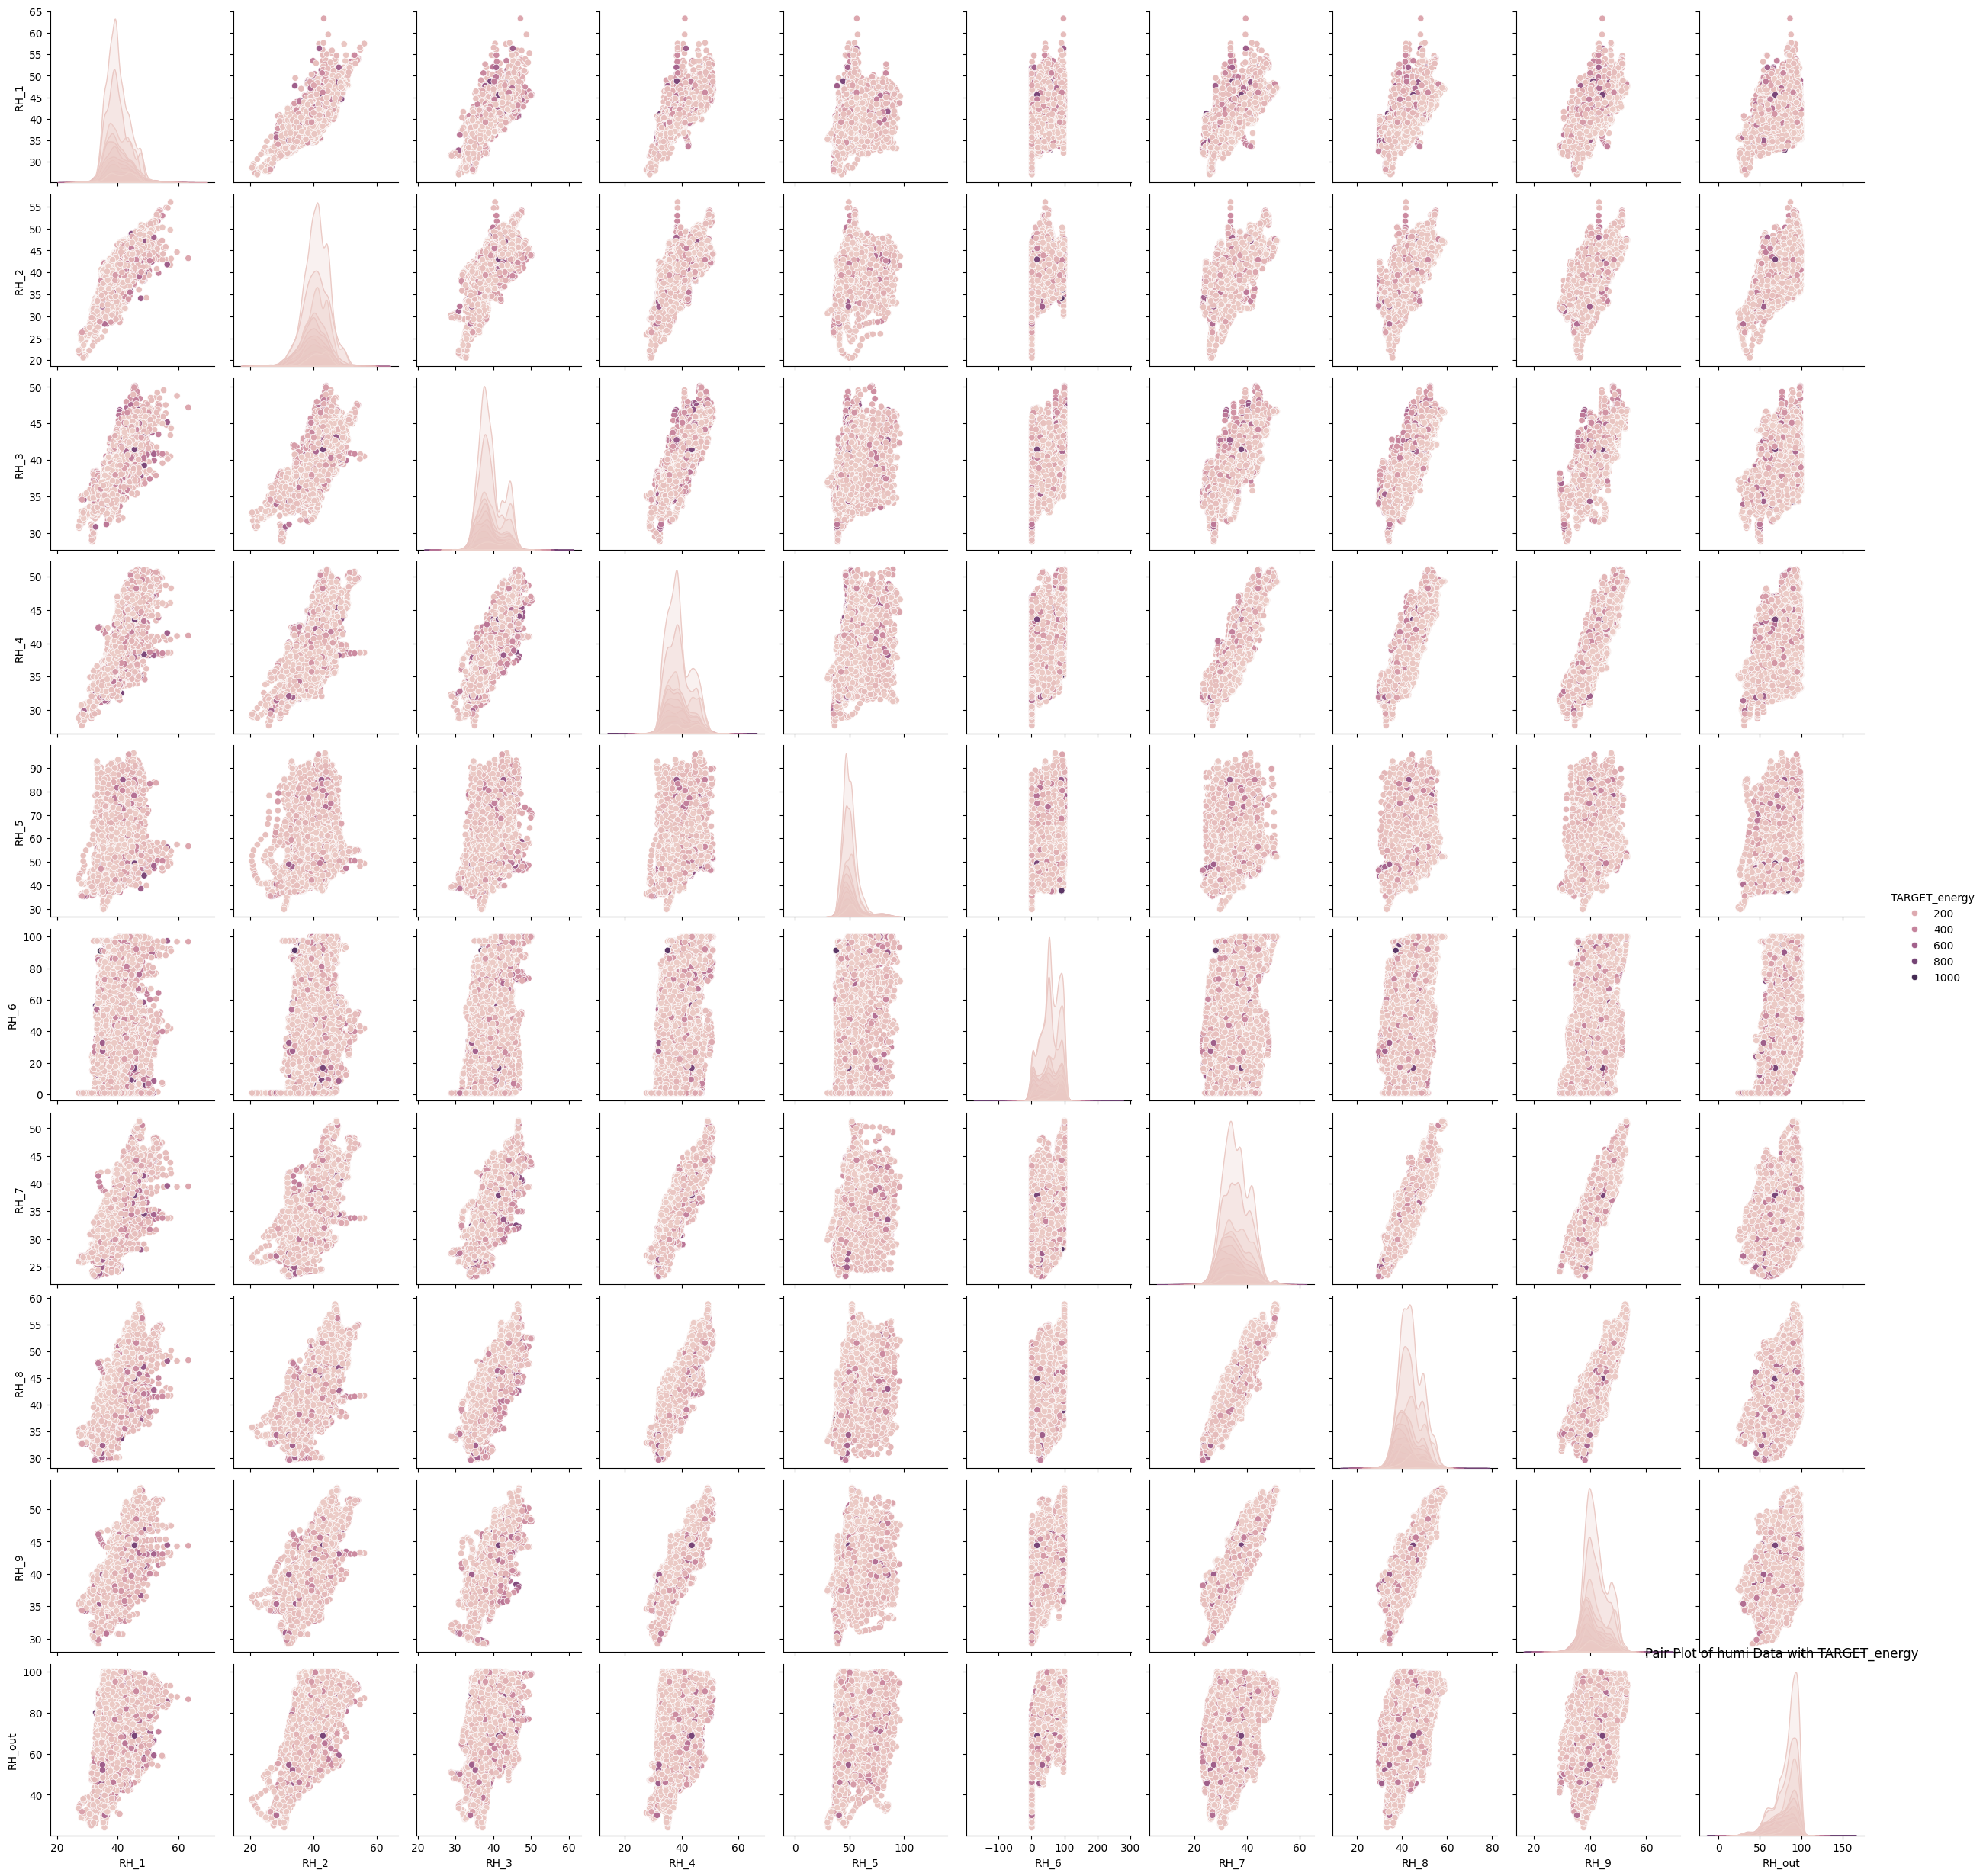

In [21]:
# Plot pairplot between humi_Data and TARGET_energy
humi_Data.append("TARGET_energy")
# humi_Data = df[humi_Data]
sns.pairplot(data[humi_Data], hue='TARGET_energy')
plt.title('Pair Plot of humi Data with TARGET_energy')
plt.show()

In [22]:
#Now looking at the others
data[other_Data].describe()

Press_mm_hg     Windspeed    Visibility           rv1           rv2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean     755.522602      4.039752     38.330834     24.988033     24.988033   
std        7.399441      2.451221     11.794719     14.496634     14.496634   
min      729.300000      0.000000      1.000000      0.005322      0.005322   
25%      750.933333      2.000000     29.000000     12.497889     12.497889   
50%      756.100000      3.666667     40.000000     24.897653     24.897653   
75%      760.933333      5.500000     40.000000     37.583769     37.583769   
max      772.300000     14.000000     66.000000     49.996530     49.996530   

             LEdate       yy            mm       weekday            dd  \
count  19735.000000  19735.0  19735.000000  19735.000000  19735.000000   
mean    9867.000000   2016.0      3.101647      2.977249     16.057411   
std     5697.148117      0.0      1.339200      1.985617      8.450998   
min        0.000000   2016.0      1.000000      0.000000      1.000000   
25%     4933.500000   2016.0      2.000000      1.000000      9.000000   
50%     9867.000000   2016.0      3.000000      3.000000     16.000000   
75%    14800.500000   2016.0      4.000000      5.000000     23.000000   
max    19734.000000   2016.0      5.000000      6.000000     31.000000   

                 hh  
count  19735.000000  
mean      11.502002  
std        6.921953  
min        0.000000  
25%        6.000000  
50%       12.000000  
75%       17.000000  
max       23.000000

## 2.3 Overall Distributions

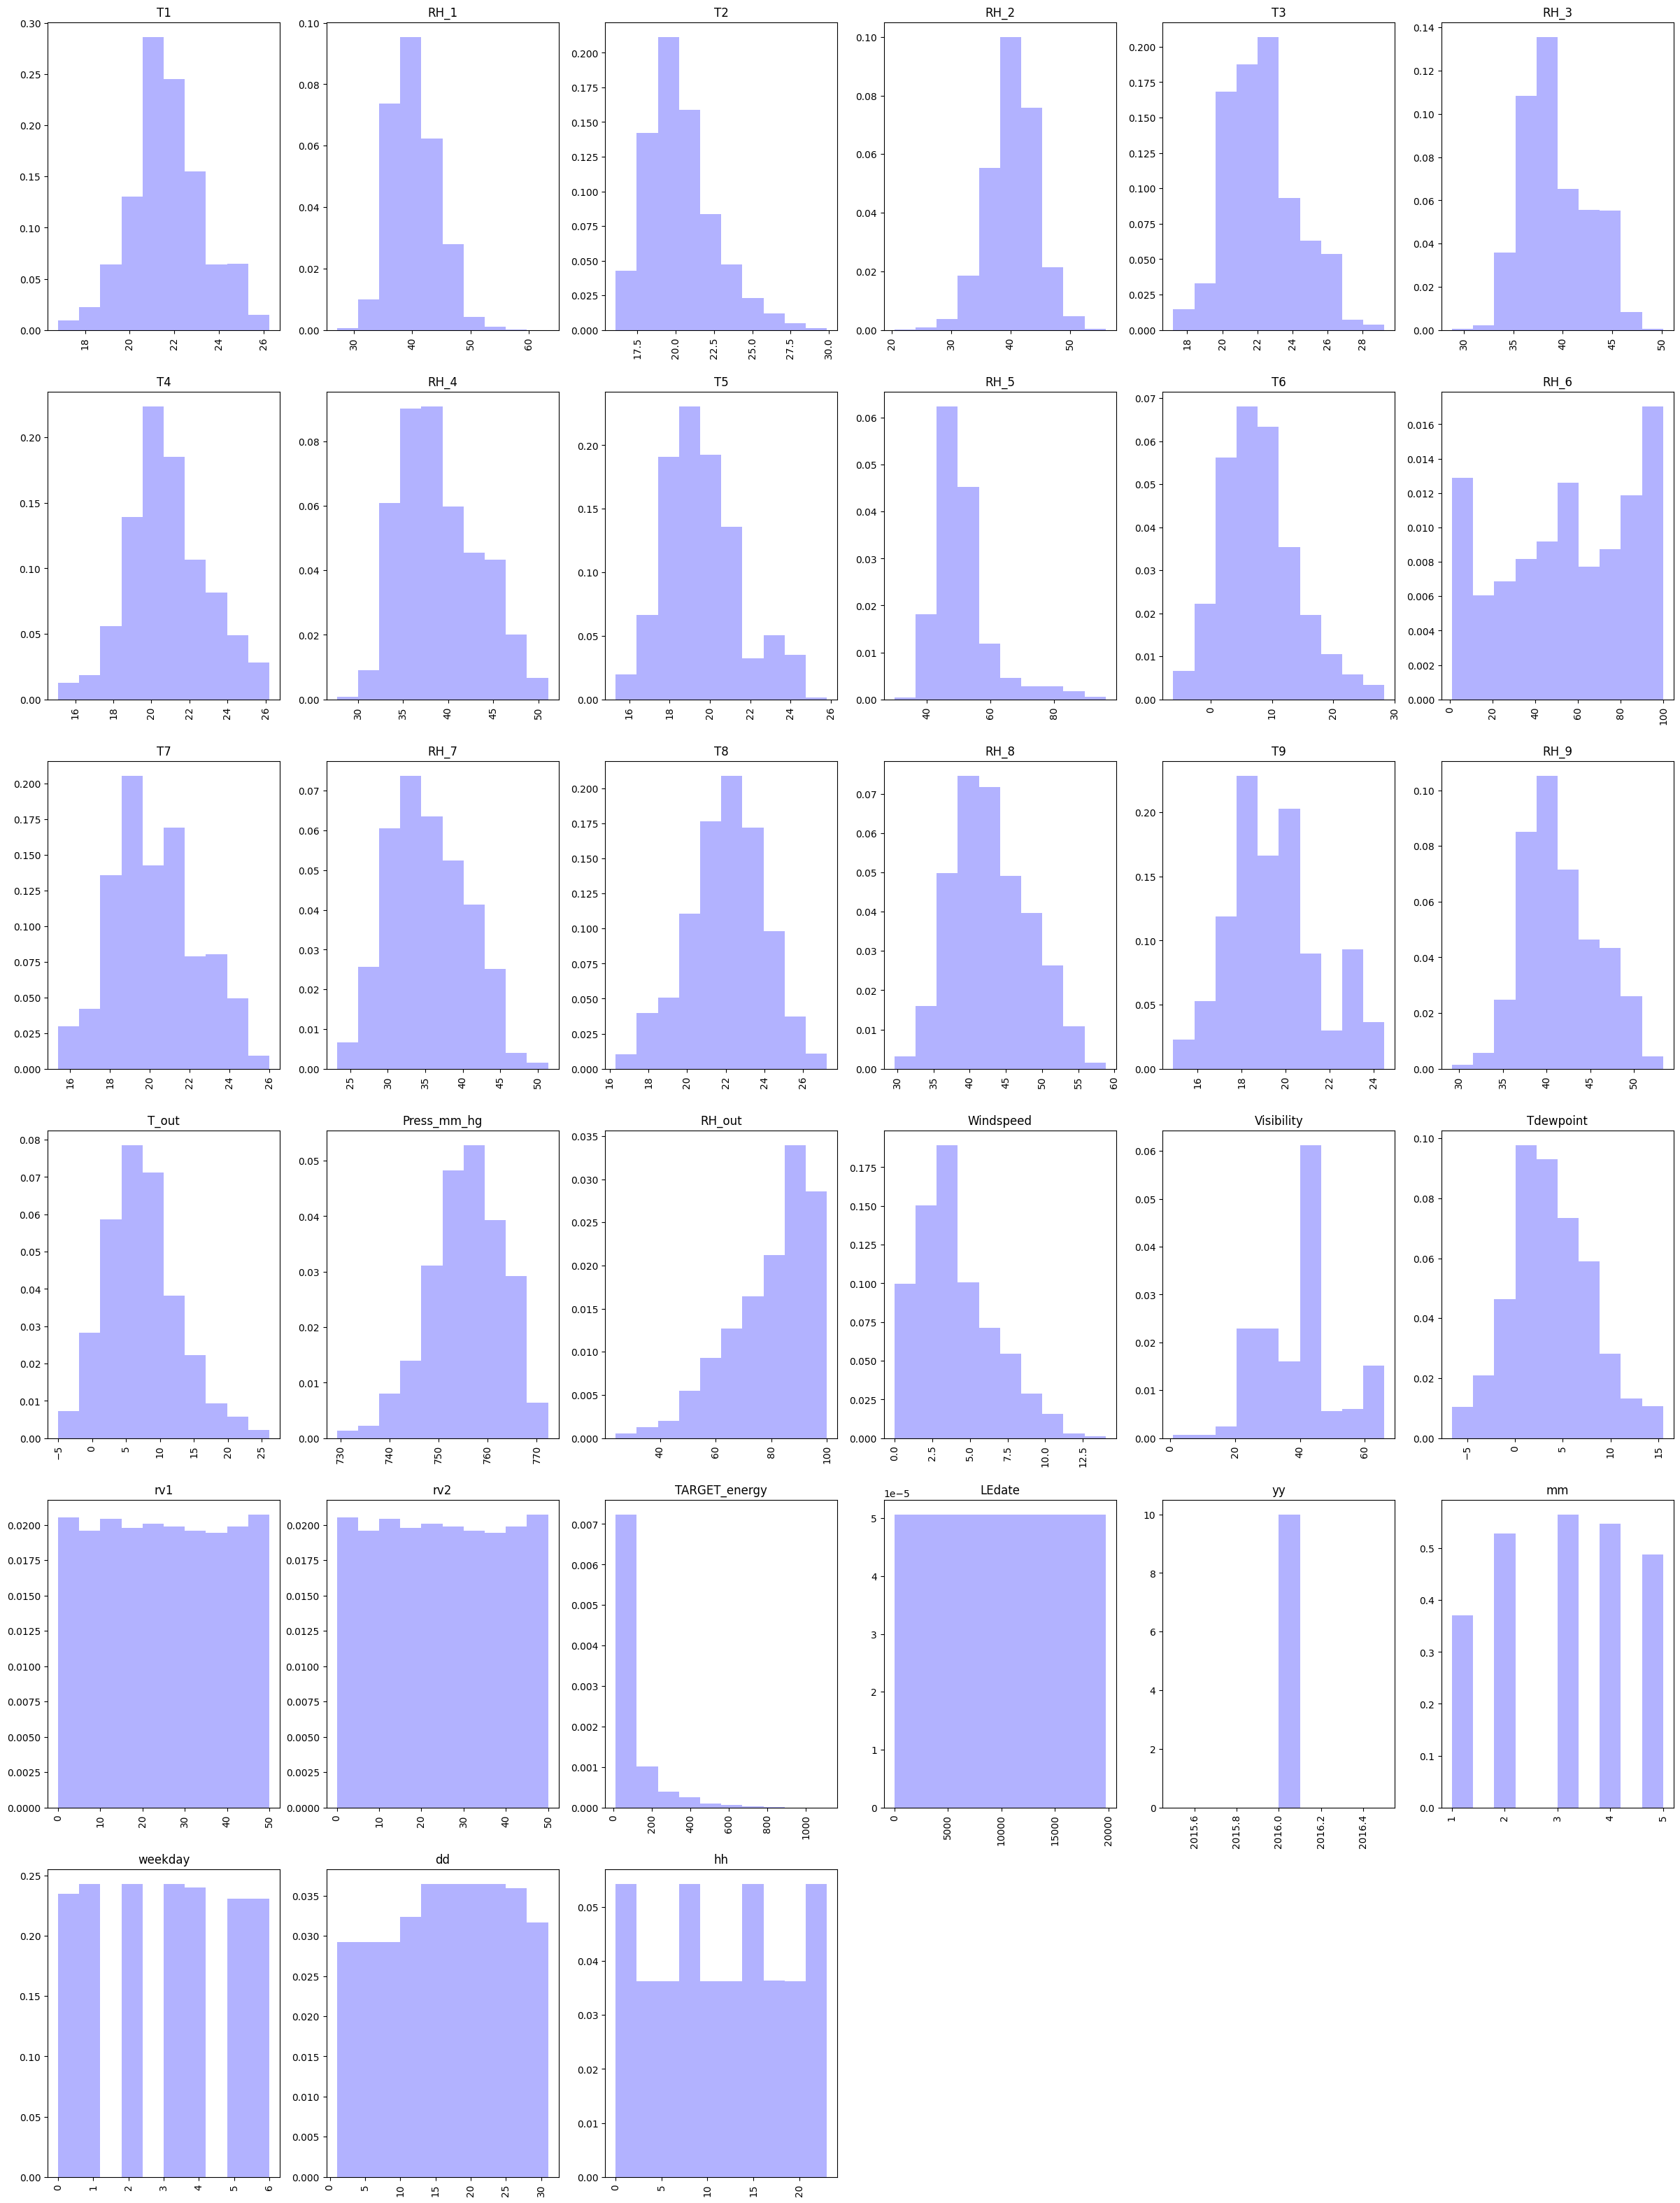

In [23]:
#Histograms for all
plt.figure(figsize=(30,40))
for i, col in enumerate(data.columns):
    plt.subplot(6,6,i+1)
    plt.hist(data[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [24]:
# Checking Unique Values count for each variable.
data[:].nunique()

T1                 722
RH_1              2547
T2                1650
RH_2              3376
T3                1426
RH_3              2618
T4                1390
RH_4              2987
T5                2263
RH_5              7571
T6                4446
RH_6              9709
T7                1955
RH_7              5891
T8                2228
RH_8              6649
T9                 924
RH_9              3388
T_out             1730
Press_mm_hg       2189
RH_out             566
Windspeed          189
Visibility         413
Tdewpoint         1408
rv1              19735
rv2              19735
TARGET_energy       91
LEdate           19735
yy                   1
mm                   5
weekday              7
dd                  31
hh                  24
dtype: int64

In [25]:
#Based on its one column and 1 unique number which is meanningless here.
data.drop(columns='yy', inplace=True)

In [26]:
#Check the stucture
data.head()

T1       RH_1         T2       RH_2         T3  \
date                                                                         
2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.230000   
2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.890000   
2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.600000   
2016-01-22 15:30:00  18.290000  38.900000  17.290000  39.260000  18.390000   
2016-02-10 00:40:00  22.290000  42.333333  21.600000  40.433333  22.666667   

                          RH_3         T4       RH_4         T5       RH_5  \
date                                                                         
2016-04-19 20:30:00  37.030000  22.318571  36.610000  20.633333  62.166667   
2016-03-05 04:40:00  37.663333  18.700000  36.260000  18.463333  43.560000   
2016-03-14 12:40:00  36.290000  21.000000  34.826667  18.100000  46.126667   
2016-01-22 15:30:00  39.326667  16.100000  38.790000  16.100000  47.700000   
2016-02-10 00:40:00  43.363333  19.100000  40.900000  19.290000  50.745000   

                     ...  Visibility  Tdewpoint        rv1        rv2  \
date                 ...                                                
2016-04-19 20:30:00  ...   40.000000   3.350000  24.061869  24.061869   
2016-03-05 04:40:00  ...   41.333333   0.100000   4.622052   4.622052   
2016-03-14 12:40:00  ...   22.666667  -0.266667   5.635898   5.635898   
2016-01-22 15:30:00  ...   41.000000   0.500000  49.216445  49.216445   
2016-02-10 00:40:00  ...   56.000000   1.400000  47.617579  47.617579   

                     TARGET_energy  LEdate  mm  weekday  dd  hh  
date                                                             
2016-04-19 20:30:00             60   14277   4        1  19  20  
2016-03-05 04:40:00             50    7702   3        5   5   4  
2016-03-14 12:40:00             80    9046   3        0  14  12  
2016-01-22 15:30:00             40    1575   1        4  22  15  
2016-02-10 00:40:00             60    4222   2        2  10   0  

[5 rows x 32 columns]

<ipython-input-27-c83b07627925>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TARGET_energy'])


3.3029975760329506


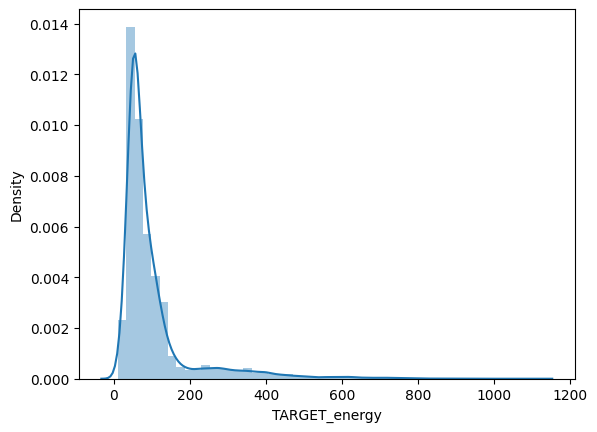

In [27]:
#Distance plot for Life Expectancy column
sns.distplot(data['TARGET_energy'])

#Find the skewness of life expectancy
print(data['TARGET_energy'].skew())

In [28]:
#Colums to visualize the skews and outliers except the status which will be checked later.
columns = {1: 'TARGET_energy', 2: 'T1', 3: 'T2', 4: 'T3',5: 'T4' ,
           6: 'T5', 7: 'T6',8: 'T7', 9: 'T8', 10: 'T9',11: 'T_out',
           12: 'RH_1',13: 'RH_2', 14: 'RH_3', 15: 'RH_4', 16: 'RH_5',
           17: 'RH_6', 18: 'RH_7',19: 'RH_8', 20: 'RH_9',21: 'RH_out',
           22: 'Press_mm_hg',23: 'Windspeed',24: 'Visibility',
           25: 'Tdewpoint',26: 'rv1',27: 'rv2',28: 'mm',29: 'hh',30: 'weekday',31: 'LEdate'}

# Create a list to store (column name, skew value) tuples
skew_values = []

# Calculate skew for each column and store in the list
for i, column in columns.items():
    skew = data[column].skew()
    skew_values.append((column, skew))

# Sort the list by absolute value of the skew
sorted_skew_values = sorted(skew_values, key=lambda x: abs(x[1]), reverse=True)

# Print the sorted skew values
for column, skew in sorted_skew_values:
    print(f"{column}: {skew}")


TARGET_energy: 3.3029975760329506
RH_5: 1.8668200195471278
RH_out: -0.9229972472879404
T2: 0.8896578498994719
Windspeed: 0.8599821006227246
T6: 0.5974713395616409
T5: 0.5582196988262581
T_out: 0.5342726299233066
RH_3: 0.4675890799524009
RH_1: 0.46577375642231567
T3: 0.45077733510087425
RH_4: 0.4446143392062079
Visibility: 0.4415544617776746
Press_mm_hg: -0.42044151823487375
T9: 0.3827112390301907
RH_9: 0.3689370432503065
RH_8: 0.3080356149117528
RH_2: -0.26824717344228055
T8: -0.25615113577916443
T7: 0.2547224169425053
RH_7: 0.2421408289502797
RH_6: -0.24196120045189276
Tdewpoint: 0.2393740765734035
T4: 0.17038405715993443
T1: 0.12091711738519574
mm: -0.06796901264352732
weekday: 0.01935427240964743
rv1: 0.004944595412162043
rv2: 0.004944595412162043
hh: -0.000673050093866736
LEdate: 0.0


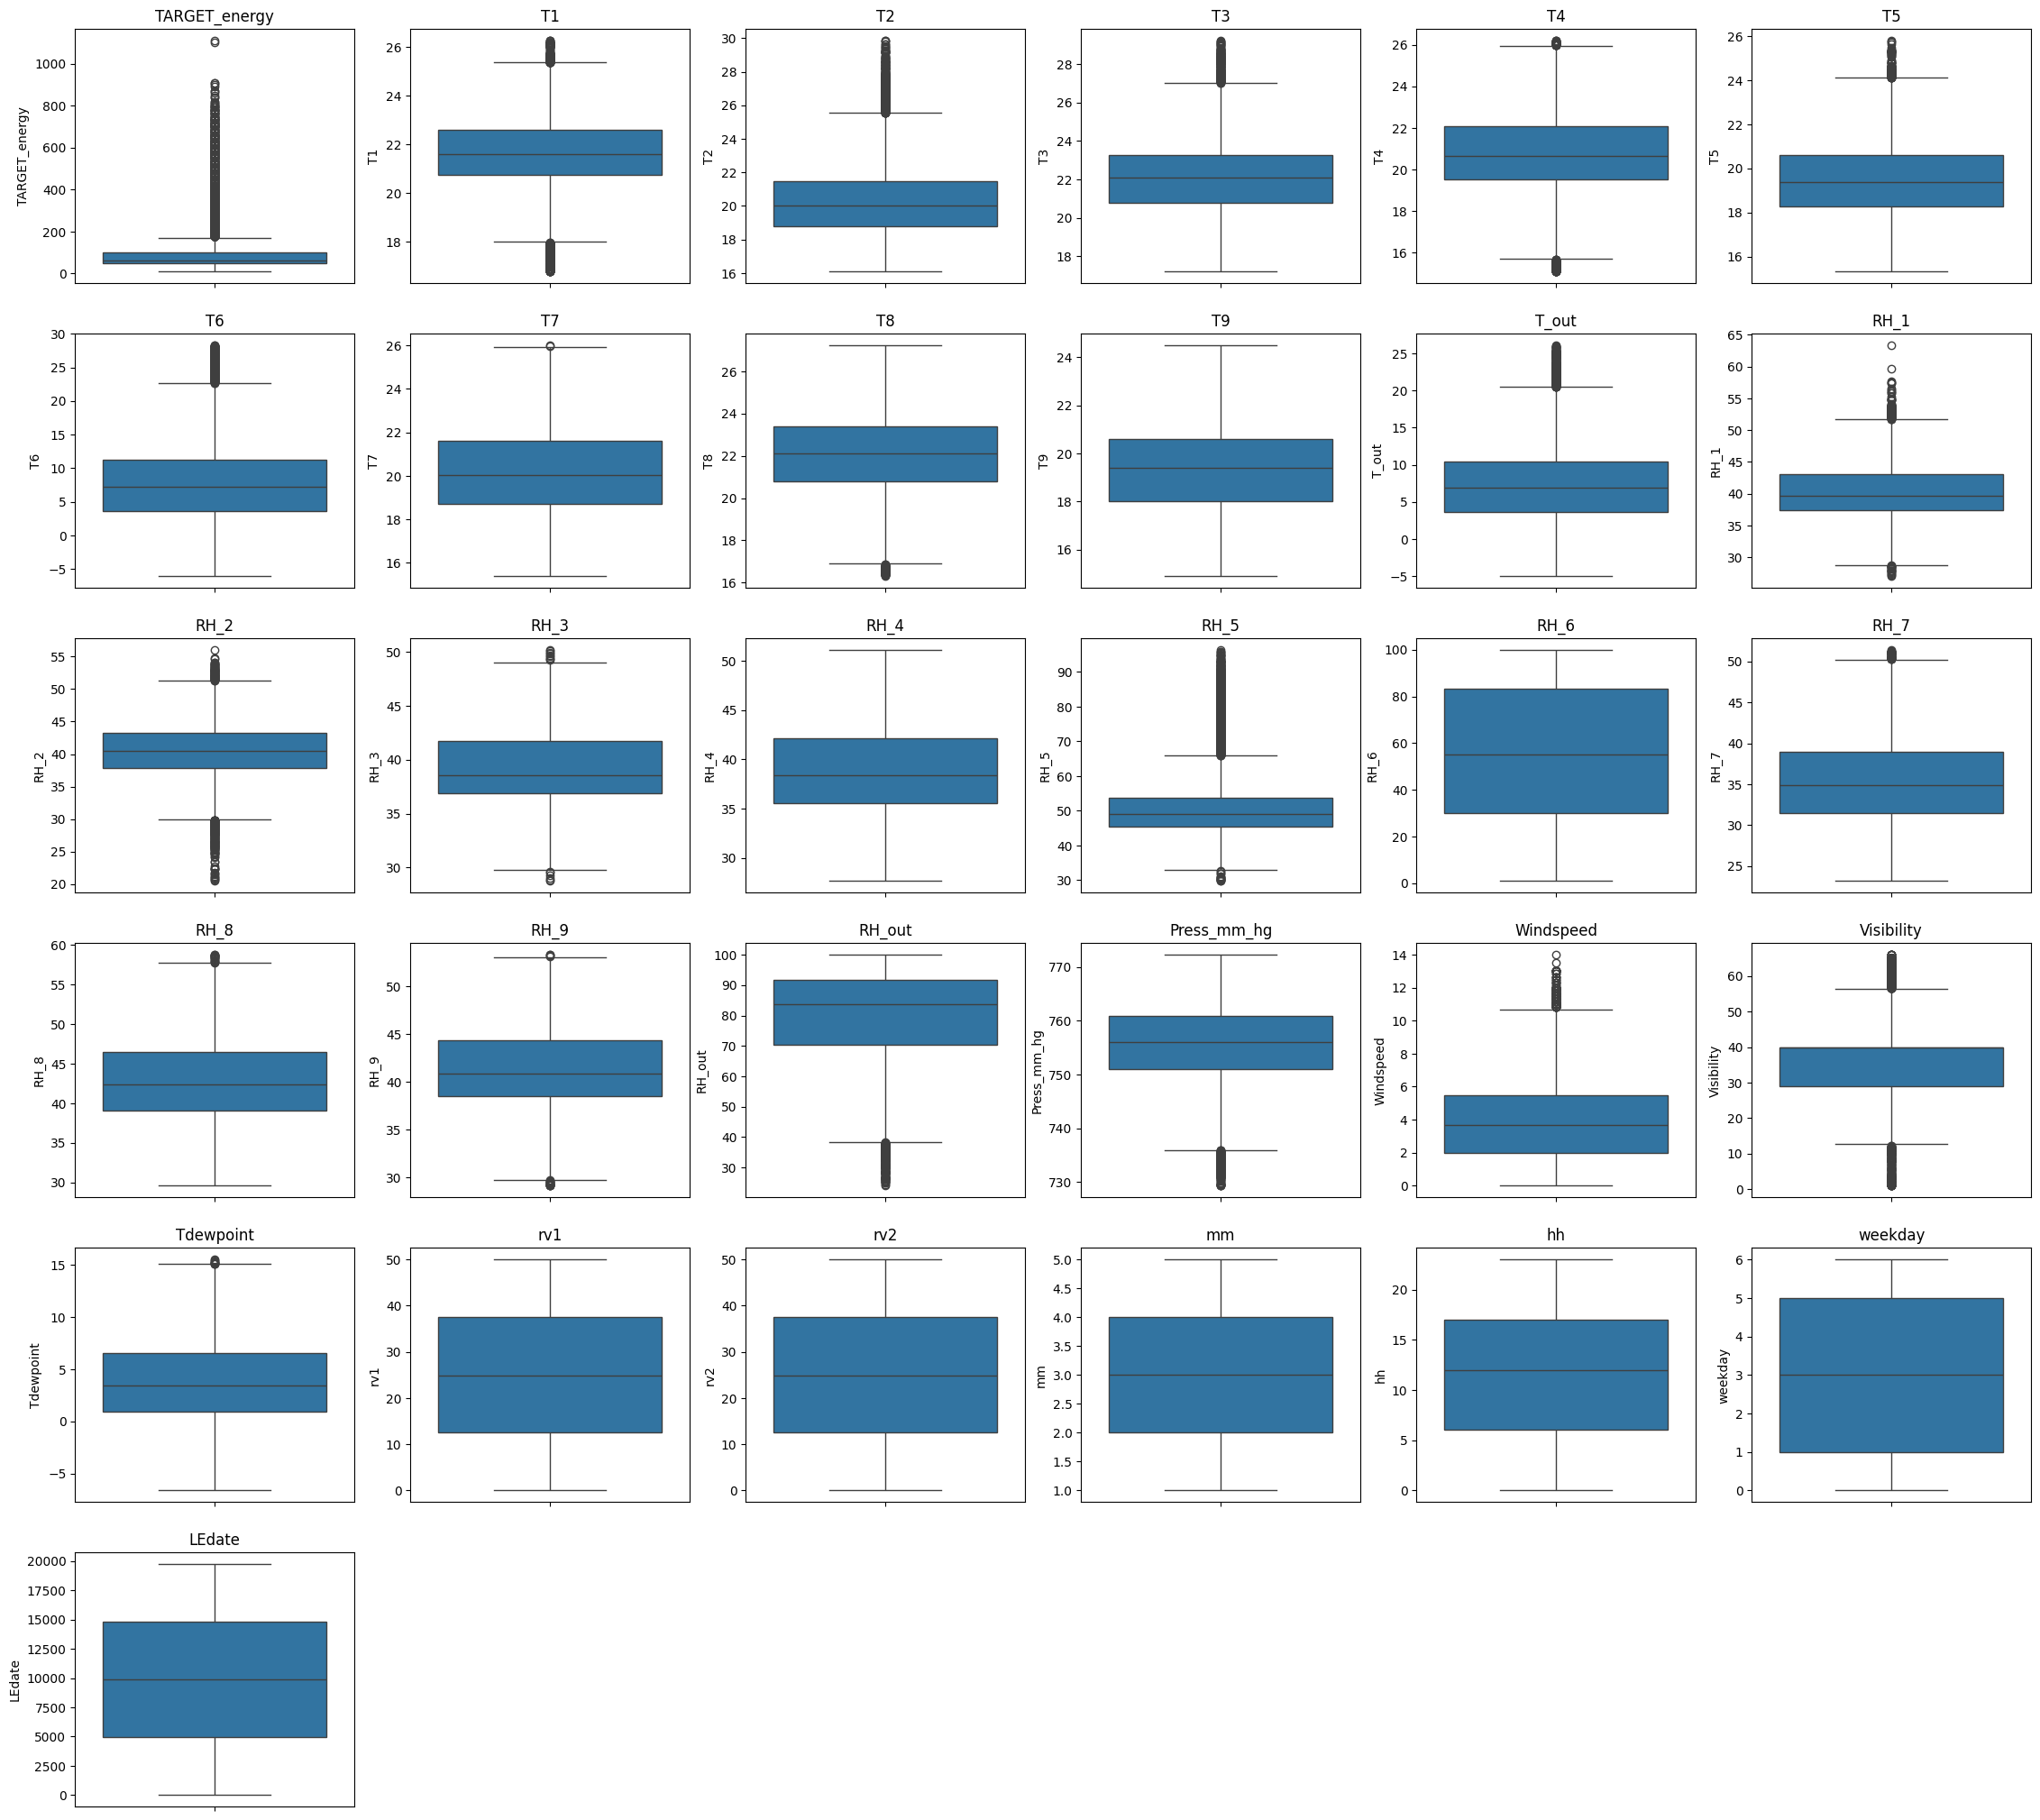

In [29]:
#Box Plots to visualize the outliers
plt.figure(figsize=(28, 30))

for i, column in columns.items():
                     plt.subplot(7,6,i)
                     sns.boxplot(data[column], orient='v')
                     plt.title(column)

plt.show()


## 2.4 Heat Map Plot to show value relations between data pairs

<Axes: >

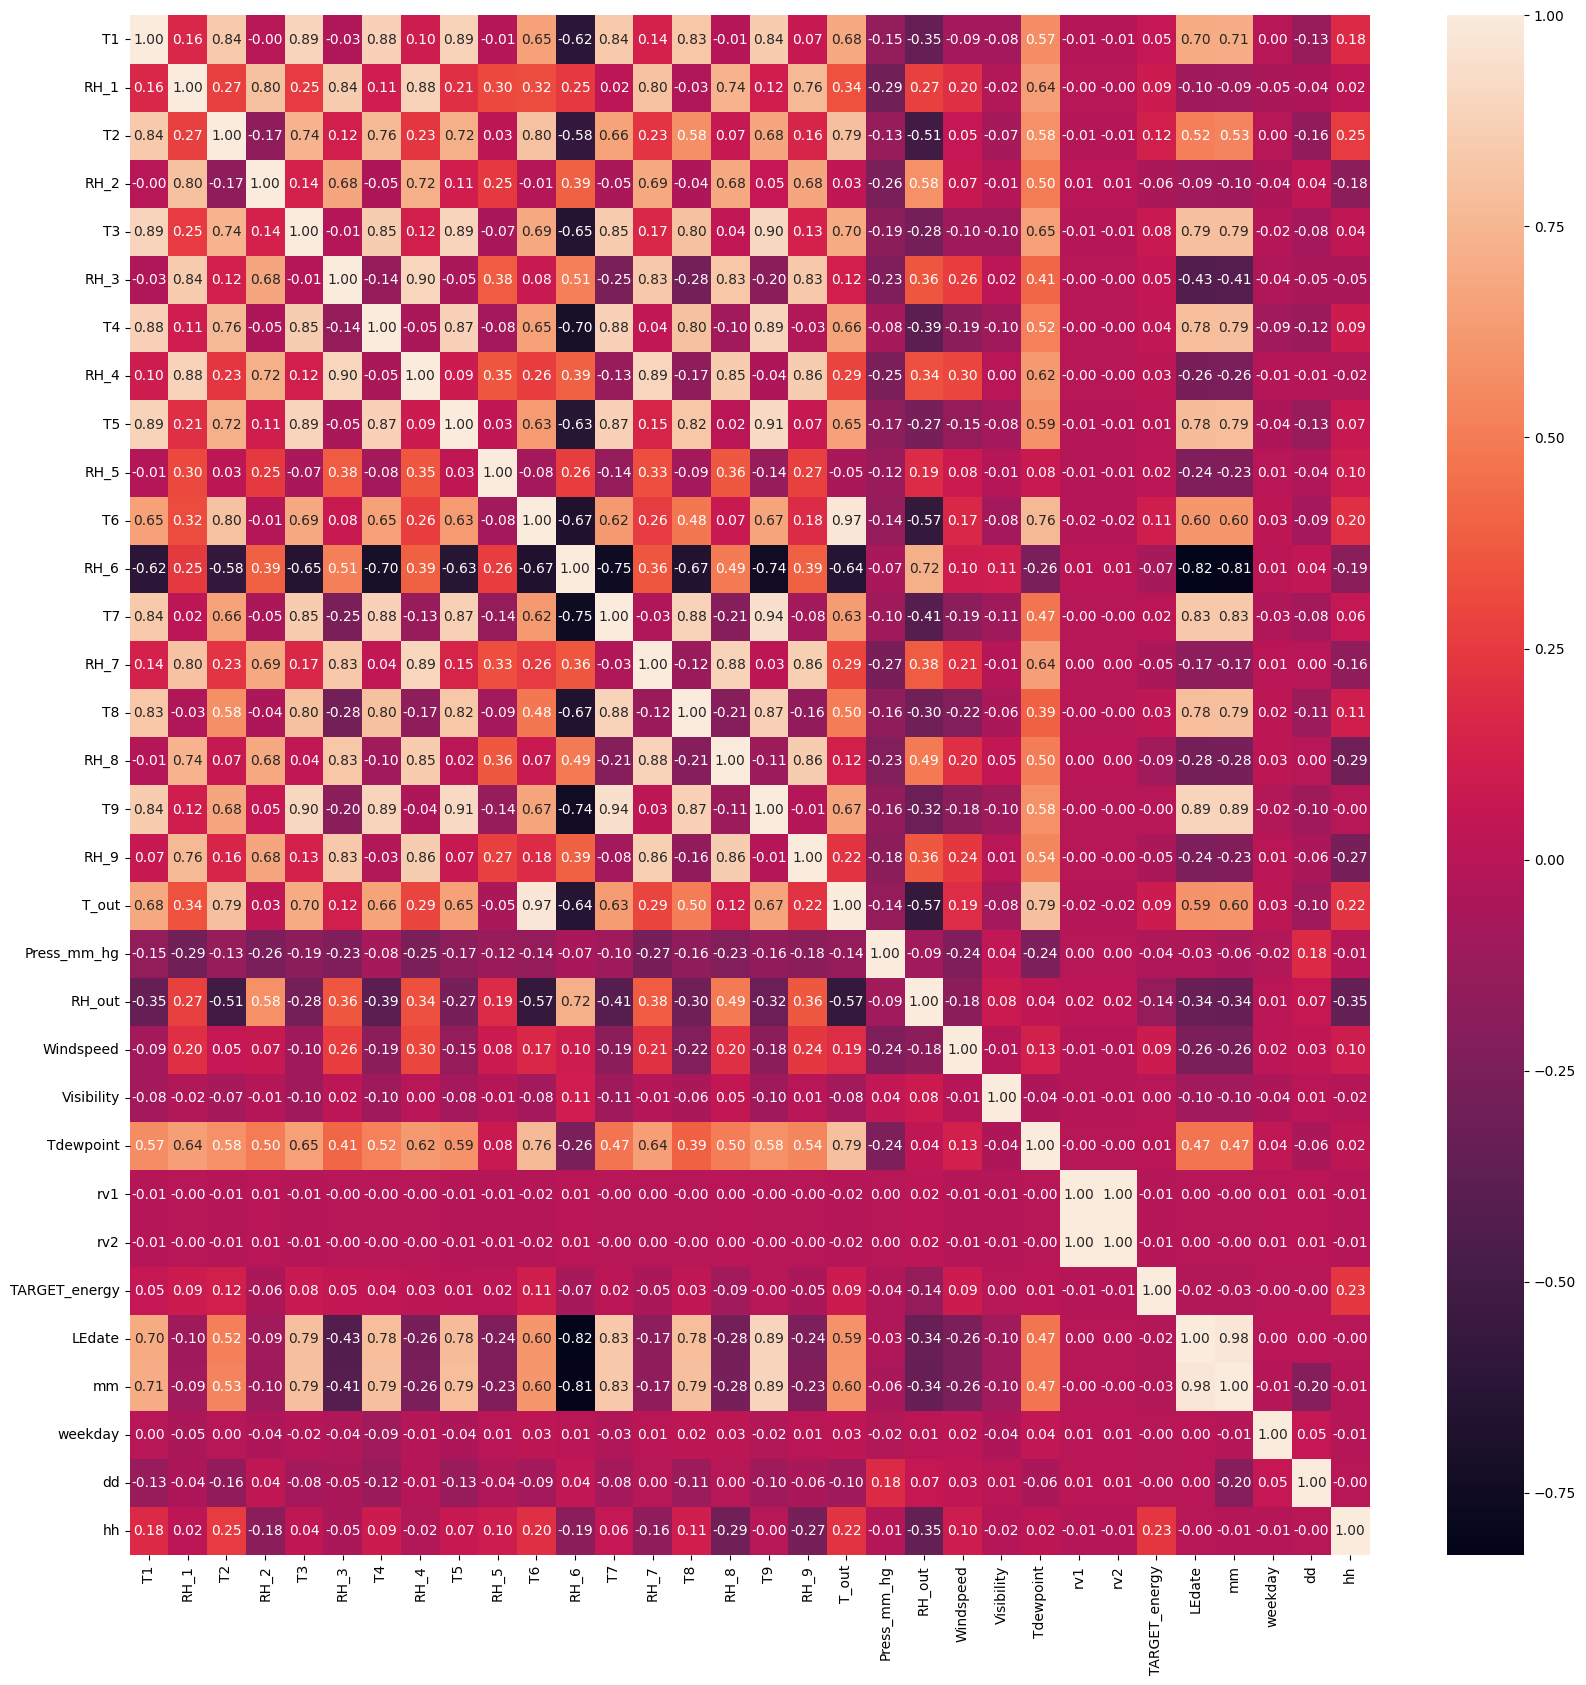

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(ax=ax,annot=True, fmt = ".2f",data=data.corr())

<Axes: xlabel='mm'>

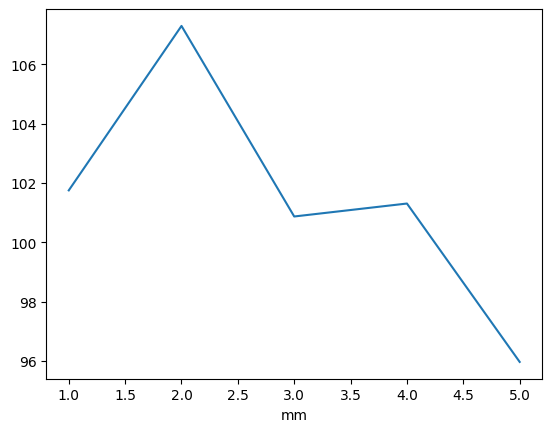

In [31]:
#Discover the relationship between month and enegry
data.groupby('mm').mean()['TARGET_energy'].plot()

<Axes: xlabel='hh'>

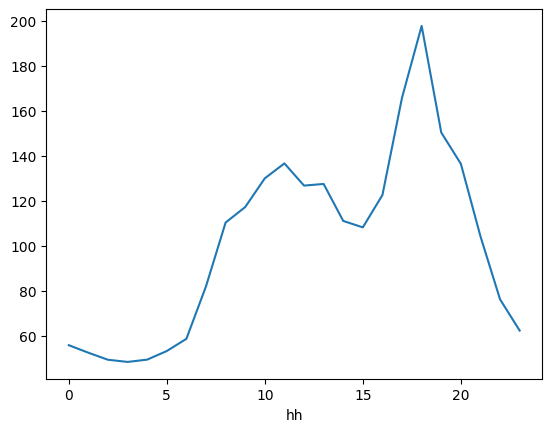

In [32]:
#Same to the hour
data.groupby('hh').mean()['TARGET_energy'].plot()

They are conversely


Text(0, 0.5, 'Target Energy')

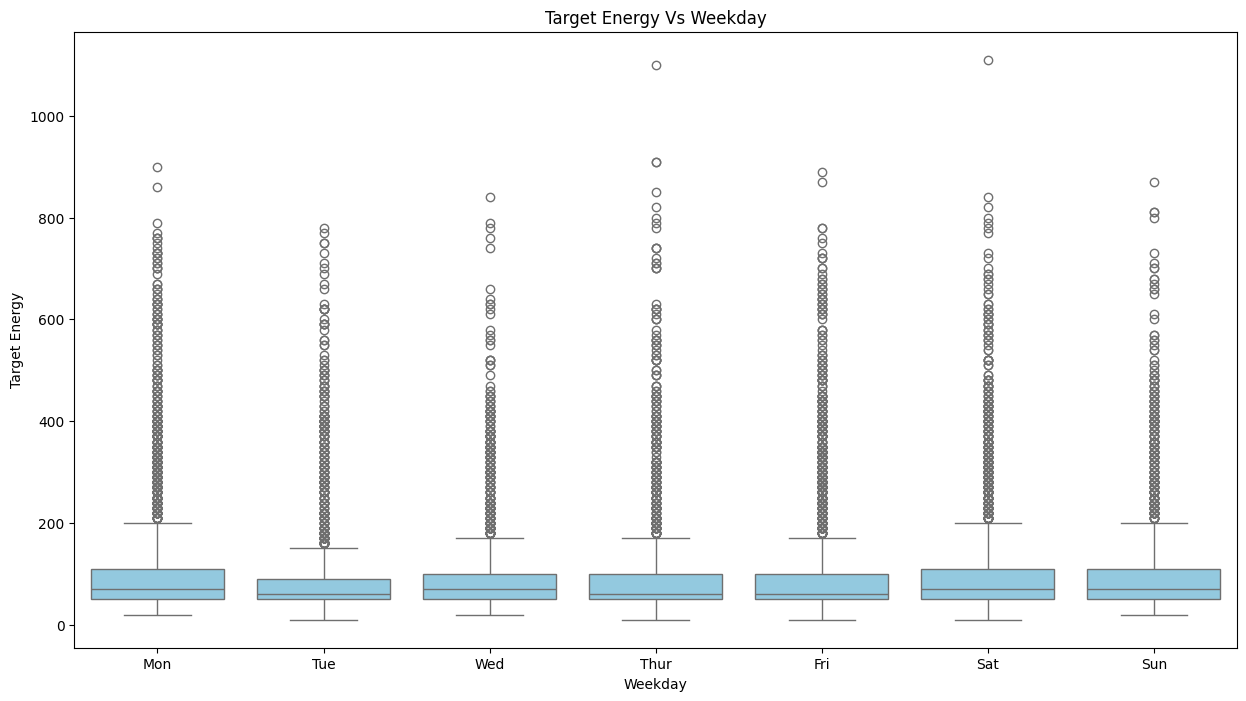

In [33]:
# Map the day of the week values to their respective names
day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
data['weekday'] = data['weekday'].map(lambda x: day_names[x])

# Create a box plot or violin plot to compare energy consumption across different days of the week
plt.figure(figsize=(15, 8))
sns.boxplot(x='weekday', y='TARGET_energy', data=data, order=day_names, color='skyblue')
plt.title('Target Energy Vs Weekday')
plt.xlabel('Weekday')
plt.ylabel('Target Energy')

In [34]:
#The boxplot for each weekday are similar at all perspectives,eg,IQR,range,outlier,fences.. Also implies the non-related
data.drop(columns='weekday', inplace=True)

In [35]:
data

T1       RH_1         T2       RH_2         T3  \
date                                                                         
2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.230000   
2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.890000   
2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.600000   
2016-01-22 15:30:00  18.290000  38.900000  17.290000  39.260000  18.390000   
2016-02-10 00:40:00  22.290000  42.333333  21.600000  40.433333  22.666667   
...                        ...        ...        ...        ...        ...   
2016-01-27 06:30:00  20.100000  44.900000  19.390000  44.172500  19.700000   
2016-04-14 08:50:00  21.390000  41.090000  19.230000  44.633333  22.790000   
2016-04-25 08:30:00  20.890000  36.500000  18.000000  40.230000  22.133333   
2016-03-04 06:50:00  20.790000  36.700000  18.790000  38.245000  21.000000   
2016-02-16 10:20:00  19.790000  39.200000  18.230000  39.400000  21.550000   

                          RH_3         T4       RH_4         T5       RH_5  \
date                                                                         
2016-04-19 20:30:00  37.030000  22.318571  36.610000  20.633333  62.166667   
2016-03-05 04:40:00  37.663333  18.700000  36.260000  18.463333  43.560000   
2016-03-14 12:40:00  36.290000  21.000000  34.826667  18.100000  46.126667   
2016-01-22 15:30:00  39.326667  16.100000  38.790000  16.100000  47.700000   
2016-02-10 00:40:00  43.363333  19.100000  40.900000  19.290000  50.745000   
...                        ...        ...        ...        ...        ...   
2016-01-27 06:30:00  44.000000  19.066667  46.466667  17.611111  56.433333   
2016-04-14 08:50:00  38.030000  22.533333  39.360000  20.390000  44.590000   
2016-04-25 08:30:00  34.433333  20.700000  34.612000  20.000000  42.560000   
2016-03-04 06:50:00  38.790000  19.290000  36.117500  18.171429  51.500000   
2016-02-16 10:20:00  37.940000  19.230000  35.730000  18.200000  42.290000   

                     ...  Windspeed  Visibility  Tdewpoint        rv1  \
date                 ...                                                
2016-04-19 20:30:00  ...   3.500000   40.000000   3.350000  24.061869   
2016-03-05 04:40:00  ...   1.000000   41.333333   0.100000   4.622052   
2016-03-14 12:40:00  ...   6.000000   22.666667  -0.266667   5.635898   
2016-01-22 15:30:00  ...   5.500000   41.000000   0.500000  49.216445   
2016-02-10 00:40:00  ...   7.333333   56.000000   1.400000  47.617579   
...                  ...        ...         ...        ...        ...   
2016-01-27 06:30:00  ...  10.000000   34.500000   7.000000   2.233453   
2016-04-14 08:50:00  ...   1.000000   33.000000   4.116667  18.511994   
2016-04-25 08:30:00  ...   3.000000   25.500000   2.450000   6.176545   
2016-03-04 06:50:00  ...   7.285714   58.500000   2.454762   4.780297   
2016-02-16 10:20:00  ...   1.333333   62.000000  -0.266667  23.204486   

                           rv2  TARGET_energy  LEdate  mm  dd  hh  
date                                                               
2016-04-19 20:30:00  24.061869             60   14277   4  19  20  
2016-03-05 04:40:00   4.622052             50    7702   3   5   4  
2016-03-14 12:40:00   5.635898             80    9046   3  14  12  
2016-01-22 15:30:00  49.216445             40    1575   1  22  15  
2016-02-10 00:40:00  47.617579             60    4222   2  10   0  
...                        ...            ...     ...  ..  ..  ..  
2016-01-27 06:30:00   2.233453             40    2241   1  27   6  
2016-04-14 08:50:00  18.511994            100   13487   4  14   8  
2016-04-25 08:30:00   6.176545             70   15069   4  25   8  
2016-03-04 06:50:00   4.780297             50    7571   3   4   6  
2016-02-16 10:20:00  23.204486            280    5144   2  16  10  

[19735 rows x 31 columns]

# 3. Feature Transformation

## 3.1  Outliers removal

In [26]:
# Handling Outliers & Outlier treatments
df= data.copy()
columns = data.describe().columns
# Transform features using the IQR method for outlier removal
from tabulate import tabulate
#IQR method for removal
def find_outliers_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    """
    Determine the lower and upper outlier thresholds using the Interquartile Range (IQR) method.

    Args:
    - dataframe: DataFrame containing the data
    - col_name: Name of the column for which thresholds are calculated
    - th1: Lower quartile (default is 0.25)
    - th3: Upper quartile (default is 0.75)

    Returns:
    - lower_limit: Lower outlier threshold
    - upper_limit: Upper outlier threshold
    """
    q1 = dataframe[col_name].quantile(th1)
    q3 = dataframe[col_name].quantile(th3)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    # Check for outliers in each column and count the number of outliers
    count = (dataframe[col_name] < lower_limit) | (dataframe[col_name] > upper_limit)
    onum = count.sum()
    return [onum,q1,q3,upper_limit,lower_limit]

oNum=find_outliers_iqr(df,columns)[0]
print("Number of outliers per column:")
print(oNum.sort_values(ascending = False))


Number of outliers per column:
Visibility       2522
TARGET_energy    2210
RH_5             1330
T2                546
T6                515
T1                515
T_out             436
RH_out            239
RH_2              235
Press_mm_hg       219
T3                217
Windspeed         214
T4                186
T5                179
RH_1              146
T8                 71
RH_7               42
RH_9               21
RH_8               17
RH_3               15
Tdewpoint          10
T7                  2
T9                  0
RH_6                0
RH_4                0
rv1                 0
rv2                 0
date                0
dtype: int64


In [27]:
def cap_outliers(df, column_names):
    def cap_value(row, col, lower, upper):
        if row[col] > upper:
            return upper
        elif row[col] < lower:
            return lower
        else:
            return row[col]

    for col in column_names:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping function
        df[col] = df.apply(lambda row: cap_value(row, col, lower_bound, upper_bound), axis=1)

    return df
capped_data = cap_outliers(df, columns)
print(capped_data.describe())

                      date            T1          RH_1            T2  \
count                19735  19735.000000  19735.000000  19735.000000   
mean   2016-03-20 05:30:00     21.689928     40.249990     20.307042   
min    2016-01-11 17:00:00     18.000000     28.733333     16.100000   
25%    2016-02-14 23:15:00     20.760000     37.333333     18.790000   
50%    2016-03-20 05:30:00     21.600000     39.656667     20.000000   
75%    2016-04-23 11:45:00     22.600000     43.066667     21.500000   
max    2016-05-27 18:00:00     25.360000     51.666667     25.565000   
std                    NaN      1.580210      3.942554      2.093877   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.438762     22.259048     39.242344     20.857620     39.026904   
min       29.860000     17.200000     29.610000     15.675000     27.660000   
25%       37.900000     20.790000  

KeyError: 'mm'

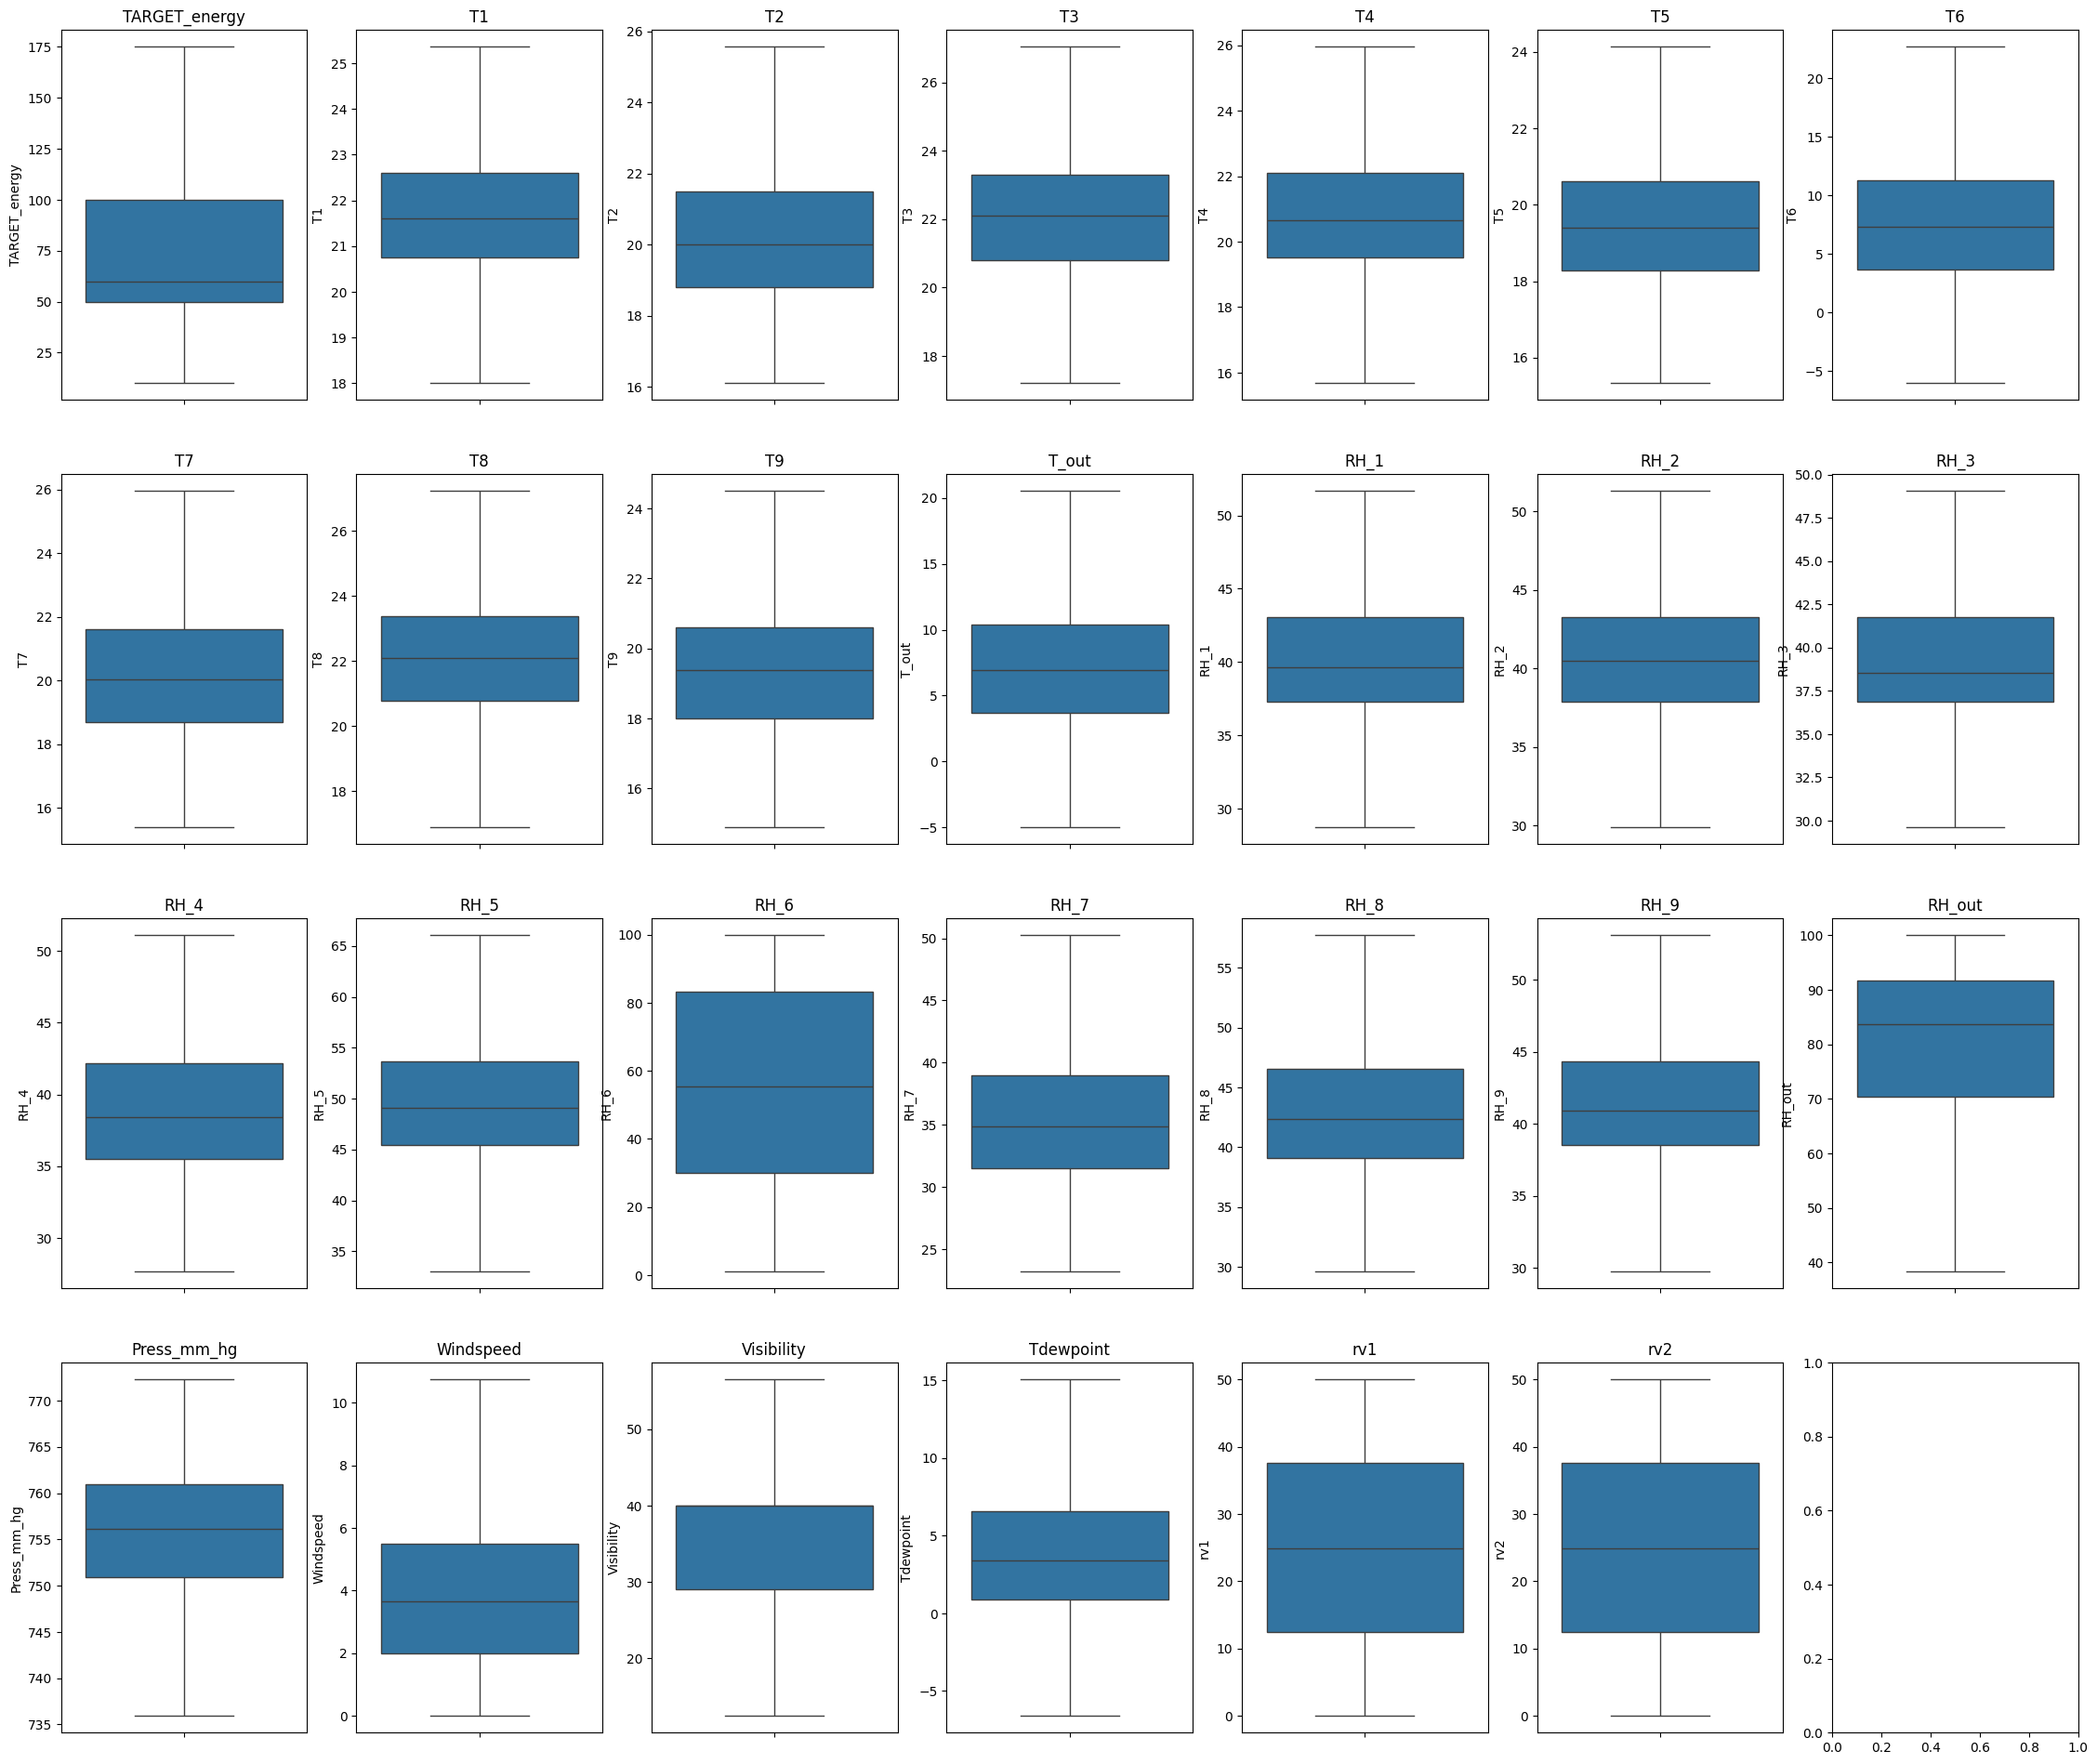

In [28]:
#Box Plots to visualize the outliers
plt.figure(figsize=(28, 30))
columns = {1: 'TARGET_energy', 2: 'T1', 3: 'T2', 4: 'T3',5: 'T4' ,
           6: 'T5', 7: 'T6',8: 'T7', 9: 'T8', 10: 'T9',11: 'T_out',
           12: 'RH_1',13: 'RH_2', 14: 'RH_3', 15: 'RH_4', 16: 'RH_5',
           17: 'RH_6', 18: 'RH_7',19: 'RH_8', 20: 'RH_9',21: 'RH_out',
           22: 'Press_mm_hg',23: 'Windspeed',24: 'Visibility',
           25: 'Tdewpoint',26: 'rv1',27: 'rv2',28: 'mm',29: 'hh',30: 'dd', 31: 'LEdate'}

for i, c in columns.items():
    plt.subplot(5,7, i)
    sns.boxplot(capped_data[c], orient='v')
    plt.title(c)

plt.show()

In [ ]:
# Plot HeatMap to show the correlations between data pairs
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(ax=ax,annot=True, fmt = ".2f",data = capped_data.corr())

In [ ]:
dataframe = capped_data.copy()
# drop random variables as it does not look like that much important while predicting the output
columns_to_drop = ['rv1','rv2','dd']
dataframe.drop(columns_to_drop, axis=1, inplace=True)

## 3.2  Transform to pre-process

In [ ]:
# Exam the skewness in the dataset to check the distribution
skewness = dataframe.skew()

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
skewed_features = skewness[abs(skewness) >= skewness_threshold].index
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = dataframe[symmetrical_features]
print(symmetrical_features)
# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = dataframe[skewed_features]
print(skewed_features)

In [ ]:
# Examining the skewed data
skewed_data

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
power_transformer = PowerTransformer()

# Fit and transform the data using the PowerTransformer
power_transformed = pd.DataFrame(power_transformer.fit_transform(skewed_data))
power_transformed.columns = skewed_data.columns

In [ ]:
# Examining the power transformed data
power_transformed

In [ ]:
# Rest index of symmetrical_data
symmetrical_data.reset_index(drop=True, inplace=True)

In [ ]:
# Concatenate horizontally (along columns)
power_transformed_data = pd.concat([symmetrical_data, power_transformed], axis=1)

In [ ]:
# Examining the transformed data
power_transformed_data

In [ ]:
#Import StandardScaler for preprocessing
from sklearn.preprocessing import StandardScaler

#Use StandardScaler fitting_transform data to get the scaled data
scaler = StandardScaler()
standardscaled_data = pd.DataFrame(scaler.fit_transform(power_transformed_data))
standardscaled_data.columns = power_transformed_data.columns
standardscaled_data

# 4. Model Development and Evaluation

## 4.1 Data Pre-process

In [49]:
# Separate the target and the attributes
data_X = power_transformed_data.copy()
data_X.drop(columns='TARGET_energy', inplace=True)
data_Y = capped_data['TARGET_energy']

## 4.2 Spliting Data

In [50]:
# First I neet to split data to train and test
# Perform Hold out validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

# Check shape of train and test data
print(f'X_train shape -->{x_train.shape}')
print(f'X_valid shape -->{x_valid.shape}')
print(f'X_test shape -->{x_test.shape}')
print(f'y_train shape -->{y_train.shape}')
print(f'y_valid shape -->{y_valid.shape}')
print(f'y_test shape -->{y_test.shape}')

X_train shape -->(15788, 27)
X_valid shape -->(1973, 27)
X_test shape -->(1974, 27)
y_train shape -->(15788,)
y_valid shape -->(1973,)
y_test shape -->(1974,)


### 4.2.1 Data Preparation

### 4.2.2 Data Checks

In [51]:
print(data_X.shape)
print(data_Y.shape)

(19735, 27)
(19735,)


In [52]:
print(data_X.describe())
print(data_Y.describe())

                 T1          RH_1          RH_2            T3          RH_3  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.689928     40.249990     40.438762     22.259048     39.242344   
std        1.580210      3.942554      3.982628      1.982974      3.253254   
min       18.000000     28.733333     29.860000     17.200000     29.610000   
25%       20.760000     37.333333     37.900000     20.790000     36.900000   
50%       21.600000     39.656667     40.500000     22.100000     38.530000   
75%       22.600000     43.066667     43.260000     23.290000     41.760000   
max       25.360000     51.666667     51.300000     27.040000     49.050000   

                 T4          RH_4            T6          RH_6            T7  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      20.857620     39.026904      7.854457     54.609083     20.267103   
std        2.035499      4.341321      5.936686    

In [53]:
data_X.columns

Index(['T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T6', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg',
       'Visibility', 'Tdewpoint', 'LEdate', 'mm', 'hh', 'T2', 'T5', 'RH_5',
       'RH_out', 'Windspeed'],
      dtype='object')

### 4.2.3 Feature Scale

Since we are planning to use models like linear regression which are sensitive to feature scales, standardization might be more appropriate.

In [54]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(x_train)
test_X_scaled = scaler.transform(x_test)
val_X_scaled = scaler.transform(x_valid)



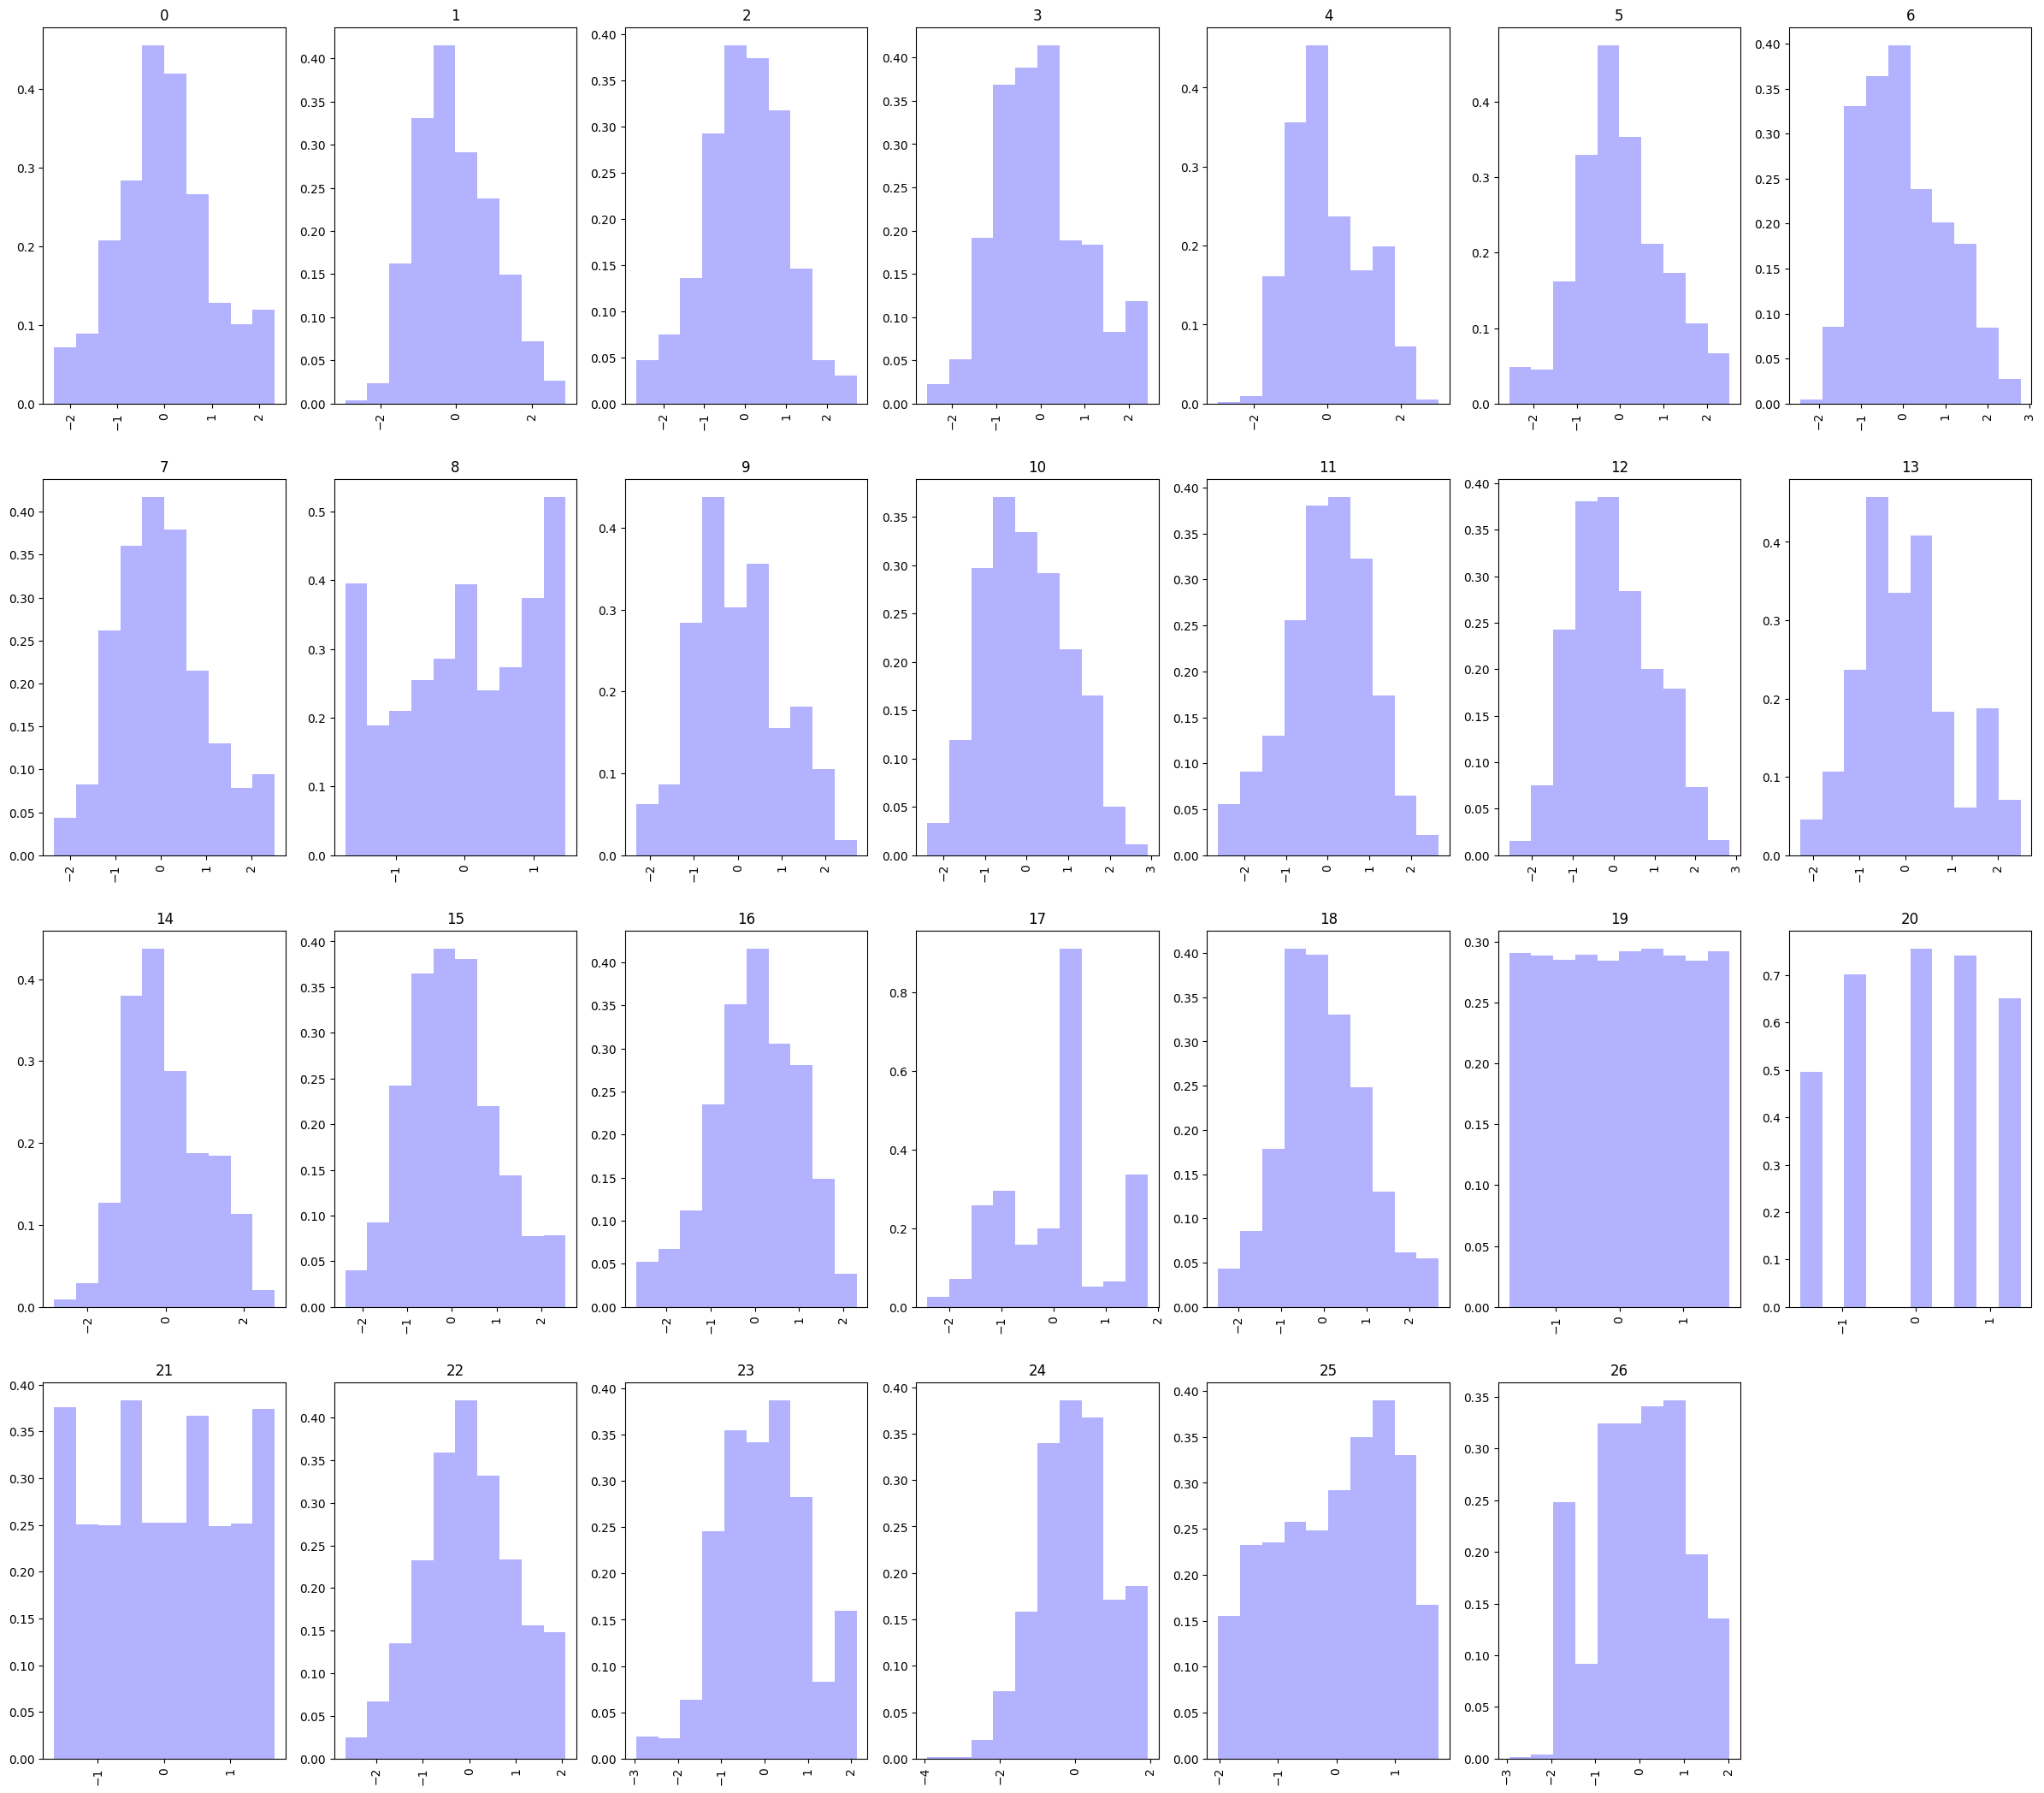

In [55]:
# Check the updated distribution after Standardize features
plt.figure(figsize=(30, 40))
for i in range(train_X_scaled.shape[1]):
    plt.subplot(6, 7, i + 1)
    plt.hist(train_X_scaled[:, i], alpha=0.3, color='b', density=True)
    plt.title(i)
    plt.xticks(rotation='vertical')


###4.2.4 Decision Tree Data

In [56]:
#Separate the target and the attributes
dataT_X = capped_data.copy()
dataT_X.drop(columns='TARGET_energy',inplace=True)
dataT_Y = capped_data['TARGET_energy']


In [57]:
#First I neet to split data to train and test

from sklearn.model_selection import train_test_split
xT_train, xT_test, yT_train, yT_test = train_test_split(dataT_X, dataT_Y, test_size=0.2, random_state=0)
xT_valid, xT_test, yT_valid, yT_test = train_test_split(xT_test, yT_test, test_size=0.5, random_state=0)

#See shape of train and test data
print(f'X_train shape -->{xT_train.shape}')
print(f'X_valid shape -->{xT_valid.shape}')
print(f'X_test shape -->{xT_test.shape}')
print(f'y_train shape -->{yT_train.shape}')
print(f'y_valid shape -->{yT_valid.shape}')
print(f'y_test shape -->{yT_test.shape}')

X_train shape -->(15788, 30)
X_valid shape -->(1973, 30)
X_test shape -->(1974, 30)
y_train shape -->(15788,)
y_valid shape -->(1973,)
y_test shape -->(1974,)


## 4.3 ML Model

## 4.3.1 Model 1: Decision Tree Model


Train the simple Decision Tree and visualize it.

In [74]:
# Import preprocessing library
from sklearn import preprocessing

# Add LabelEncoder and fit data
le = preprocessing.LabelEncoder()
le.fit(dataT_Y)
# Get the class labels in 2D format
class_labels = le.inverse_transform([0,1])
print(class_labels)

[10. 20.]


In [75]:
# Import graphviz library
import graphviz
# Function to get decision tree plot graph
def get_tree_2_plot(clf):
    dot_data = tree.export_graphviz(clf, out_file=None,
                      feature_names = dataT_X.columns,
                      filled=True, rounded=True,
                      special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

In [76]:
#Import f1_score library
from sklearn.metrics import f1_score
# Function get the accuracy score
def get_acc_scores(clf, trainT_X, trainT_y, valT_X, valT_y):
    trainT_pred = clf.predict(trainT_X)
    valT_pred = clf.predict(valT_X)

    # Get the accuracy score for train data and validation data
    trainT_acc = f1_score(trainT_y, trainT_pred, average='macro')
    valT_acc = f1_score(valT_y, valT_pred, average='macro')

    return trainT_acc, valT_acc

In [77]:
# Set up Tree model
from sklearn import tree

tree_max_depth = 4   #change this value and observe

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced')
clf = clf.fit(xT_train, yT_train)

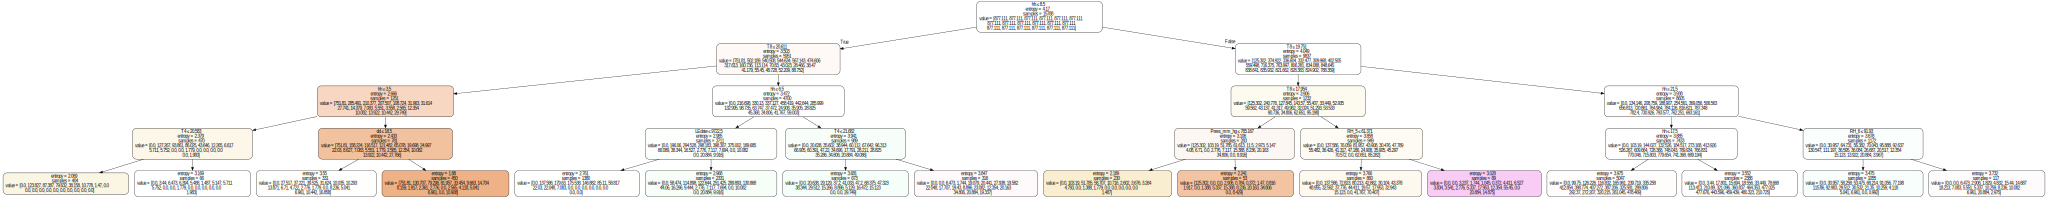

In [78]:
# Plot the Decision Tree model
Dtree = get_tree_2_plot(clf)
Dtree

In [79]:
# Get the accuracy score for train data and validation data
train_accT, val_accT = get_acc_scores(clf,xT_train, yT_train, xT_valid, yT_valid)
print("Train f1 score: {:.3f}".format(train_accT))
print("Validation f1 score: {:.3f}".format(val_accT))

Train f1 score: 0.074
Validation f1 score: 0.062


### 4.3.1.1 Hyper Parameter Tuning

Use hyper paramater DecisionTreeClassifier to get the best performance.

In [80]:
from sklearn.model_selection import GridSearchCV
# Set the max depth and min sample splilt of the Tree to do it recursively
parameters = {'max_depth':np.arange(2, 400, 50), 'min_samples_split':np.arange(2, 400, 50)}

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro')
Gridclf.fit(xT_train, yT_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  2,  52, 102, 152, 202, 252, 302, 352]),
                         'min_samples_split': array([  2,  52, 102, 152, 202, 252, 302, 352])},
             scoring='f1_macro')

In [81]:
pd.DataFrame(Gridclf.cv_results_)
# Print the best score of the best parameter
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

0.20663116722782227
{'max_depth': 102, 'min_samples_split': 2}


### 4.3.1.2 Post pruning decision trees with cost complexity pruning


The DecisionTreeClassifier provides parameter to prevent a tree from overfitting.

In [82]:
clf = tree.DecisionTreeClassifier(class_weight='balanced')
path = clf.cost_complexity_pruning_path(xT_train, yT_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [89]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(xT_train, yT_train)
    clfs.append(clf)

KeyboardInterrupt: 

In [ ]:
train_scores = [f1_score(yT_train, clf.predict(xT_train), average='macro') for clf in clfs]
val_scores = [f1_score(yT_valid, clf.predict(xT_valid), average='macro') for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 4.3.1.3 Apply Random Forest Classifier for Improvement


Inject randomness to make different trees with randomly data points used.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, n_estimators=500, class_weight='balanced_subsample', random_state=0)
clf.fit(xT_train, yT_train)

In [ ]:
train_acc, val_acc = get_acc_scores(clf,xT_train, yT_train, xT_valid, yT_valid)
print("Train Accuracy score: {:.3f}".format(train_acc))
print("Validation Accuracy score: {:.3f}".format(val_acc))

In [ ]:
dataT_X_WithoutTar = dataT_X.copy()
dataT_X_WithoutTar


In [ ]:
# Drop 'TARGET_energy' column for preparation
#data_X_WithoutTar.drop(columns='TARGET_energy', inplace = True)

In [ ]:
# Visualize the feature importance of the Random Forest Classifier
tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()

plt.figure(figsize=(10,10))

plt.barh(dataT_X_WithoutTar.columns[sorted_idx-1], tree_feature_importances[sorted_idx-1])
plt.show()

## 4.3.2 Model 2: Linear Regression

In [58]:
# 1. Model Training
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg = linear_reg.fit(train_X_scaled, y_train)
# 2. Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
val_pred = linear_reg.predict(val_X_scaled)
val_rmse = np.sqrt (mean_squared_error(y_valid, val_pred))
val_r2 = r2_score(y_valid, val_pred)

print("Linear Regression Validation Performance:")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R^2 Score: {val_r2:.4f}")

Linear Regression Validation Performance:
Validation RMSE: 37.1039
Validation R^2 Score: 0.2823


In this case, On average, the model's predictions are off by about 4.7451 units from the actual values. And approximately 72.64% of the variance in the dependent variable (target) is predictable from the independent variables used in the model.

Let's train the data in Polynomial regression and compare their peformance.

## 4.3.3 Model 3: Polynomial Regression

To test Polynomial Regression, I only try the degrees within 2 and 3. Beacuse it waste the running time when I defining a function in[2,3,4]  

In [8]:
from sklearn.preprocessing import PolynomialFeatures
# Add PolynomialFeatures
poly_features2 = PolynomialFeatures(2)
train_X_poly2 = poly_features2.fit_transform(train_X_scaled)
val_X_poly2 = poly_features2.transform(val_X_scaled)
test_X_poly2= poly_features2.transform(test_X_scaled)
# Train Polynomial Regression Model
poly_reg = LinearRegression()
poly_reg2= poly_reg.fit(train_X_poly2, y_train)
# Make predictions on the validation set
val_pred_poly2 = poly_reg2.predict(val_X_poly2)
val_rmse_poly2 = np.sqrt (mean_squared_error(y_valid, val_pred_poly2))
val_r2_poly2 = r2_score(y_valid, val_pred_poly2)
# Make predictions on the test set
test_pred_poly2 = poly_reg2.predict(test_X_poly2)
test_rmse_poly2 = np.sqrt (mean_squared_error(y_test, test_pred_poly2))
test_r2_poly2 = r2_score(y_test, test_pred_poly2)
print(f"Polynomial Regression (2):")
print(f"Validation RMSE: {val_rmse_poly2:.4f}")
print(f"Validation R^2 Score: {val_r2_poly2:.4f}")
print(f"Test RMSE: {test_rmse_poly2:.4f}")
print(f"Test R^2 Score: {test_r2_poly2:.4f}")

NameError: name 'train_X_scaled' is not defined

In [60]:
# Train Polynomial Regression Model
poly_features3 = PolynomialFeatures(3)
train_X_poly3 = poly_features3.fit_transform(train_X_scaled)
val_X_poly3 = poly_features3.transform(val_X_scaled)
test_X_poly3= poly_features3.transform(test_X_scaled)

poly_reg3= poly_reg.fit(train_X_poly3, y_train)

val_pred_poly3 = poly_reg3.predict(val_X_poly3)
val_rmse_poly3 =np.sqrt ( mean_squared_error(y_valid, val_pred_poly3))
val_r2_poly3 = r2_score(y_valid, val_pred_poly3)
# Make predictions on the test set
test_pred_poly3 = poly_reg3.predict(test_X_poly3)
test_rmse_poly3 = np.sqrt (mean_squared_error(y_test, test_pred_poly3))
test_r2_poly3 = r2_score(y_test, test_pred_poly3)

print(f"Polynomial Regression (3):")
print(f"Validation RMSE: {val_rmse_poly3:.4f}")
print(f"Validation R^2 Score: {val_r2_poly3:.4f}")
print(f"Test RMSE: {test_rmse_poly3:.4f}")
print(f"Test R^2 Score: {test_r2_poly3:.4f}")

Polynomial Regression (3):
Validation RMSE: 26.0810
Validation R^2 Score: 0.6454
Test RMSE: 27.0837
Test R^2 Score: 0.6255


In [7]:
# Train Polynomial Regression Model
poly_features4 = PolynomialFeatures(4)
train_X_poly4 = poly_features4.fit_transform(train_X_scaled)
val_X_poly4 = poly_features4.transform(val_X_scaled)
test_X_poly4= poly_features4.transform(test_X_scaled)

poly_reg4= poly_reg.fit(train_X_poly4, y_train)

val_pred_poly4 = poly_reg4.predict(val_X_poly4)
val_rmse_poly4 =np.sqrt ( mean_squared_error(y_valid, val_pred_poly4))
val_r2_poly4 = r2_score(y_valid, val_pred_poly3)
# Make predictions on the test set
test_pred_poly4 = poly_reg4.predict(test_X_poly4)
test_rmse_poly4 = np.sqrt (mean_squared_error(y_test, test_pred_poly4))
test_r2_poly4 = r2_score(y_test, test_pred_poly4)

print(f"Polynomial Regression (3):")
print(f"Validation RMSE: {val_rmse_poly4:.4f}")
print(f"Validation R^2 Score: {val_r2_poly4:.4f}")
print(f"Test RMSE: {test_rmse_poly4:.4f}")
print(f"Test R^2 Score: {test_r2_poly4:.4f}")

NameError: name 'PolynomialFeatures' is not defined

In [6]:
print(f"Polynomial Regression (3):")
print(f"Validation RMSE: {val_rmse_poly4:.4f}")
print(f"Validation R^2 Score: {val_r2_poly4:.4f}")
print(f"Test RMSE: {test_rmse_poly4:.4f}")
print(f"Test R^2 Score: {test_r2_poly4:.4f}")

Polynomial Regression (3):


NameError: name 'val_rmse_poly4' is not defined

In [ ]:
# Initialize lists to store results
degrees = [2, 3, 4]
val_preds = []
test_preds = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree)
    train_X_poly = poly_features.fit_transform(train_X_scaled)
    val_X_poly = poly_features.transform(val_X_scaled)
    test_X_poly = poly_features.transform(test_X_scaled)

    poly_reg = LinearRegression()
    poly_reg.fit(train_X_poly, y_train)

    val_pred = poly_reg.predict(val_X_poly)
    val_preds.append(val_pred)
    val_rmse = np.sqrt(mean_squared_error(y_valid, val_pred))
    val_r2 = r2_score(y_valid, val_pred)

    test_pred = poly_reg.predict(test_X_poly)
    test_preds.append(test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_r2 = r2_score(y_test, test_pred)

    print(f"Polynomial Regression ({degree}):")
    print(f"Validation RMSE: {val_rmse:.4f}")
    print(f"Validation R^2 Score: {val_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R^2 Score: {test_r2:.4f}")



### 4.3.3.1 Evaluation

In [ ]:
# Plotting
fig, ax = plt.subplots()

colors = ['blue', 'green', 'red']
markers = ['o', 's', '^']
labels = ['Degree 2', 'Degree 3', 'Degree 4']

for i, degree in enumerate(degrees):
    ax.scatter(y_valid, val_preds[i], s=25, label=f'Degree {degree} Validation', color=colors[i], marker=markers[i], zorder=10)
    ax.scatter(y_test, test_preds[i], s=25, label=f'Degree {degree} Test', color=colors[i], marker=markers[i], edgecolors='k', zorder=10)

# Diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Actual Life Span')
plt.ylabel('Predicted Life Span')
plt.legend()
plt.title('Polynomial Regression Predictions vs Actual Values')

plt.show()

In [ ]:
#Ploting the Diagnostic Plots to verify the accuray of baseline model
fig, ax = plt.subplots()
ax.scatter(y_valid, val_pred_poly3, s=25, cmap=plt.cm.coolwarm, zorder=10)
ax.scatter(y_valid, val_pred_poly3, s=25, cmap=plt.cm.coolwarm, zorder=10)


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.plot(lims, [np.mean(y_train),]*2, 'r--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Actual life span')
plt.ylabel('Predicted life span')

plt.show()

In [ ]:
fig, ax = plt.subplots()
for i, degree in enumerate(degrees):
    ax.scatter(y_valid, y_valid - val_preds[i], s=25, label=f'Degree {degree} Validation', color=colors[i], marker=markers[i], zorder=10)
    ax.scatter(y_test, y_test - test_preds[i], s=25, label=f'Degree {degree} Test', color=colors[i], marker=markers[i], edgecolors='k', zorder=10)

# Horizontal line at zero residual
xlims = ax.get_xlim()
ax.plot(xlims, [0.0, 0.0], 'k--', alpha=0.75, zorder=0)
ax.set_xlim(xlims)

plt.xlabel('Actual Life Span')
plt.ylabel('Residual')
plt.legend()
plt.title('Residuals for Polynomial Regression Models')

plt.show()

## 4.3.4 Research Model 1: Random Forest Model


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Use the polynomial features transformed data for degree 3
poly_features3 = PolynomialFeatures(3)
train_X_poly3 = poly_features3.fit_transform(train_X_scaled)
val_X_poly3 = poly_features3.transform(val_X_scaled)
test_X_poly3 = poly_features3.transform(test_X_scaled)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Train the model
rf_model.fit(train_X_poly3, y_train)

# Make predictions on the validation set
val_pred_rf = rf_model.predict(val_X_poly3)

# Make predictions on the test data
test_pred_rf = rf_model.predict(test_X_poly3)

# Calculate Test MSE and Test R-squared
test_rmse_rf = np.sqrt (mean_squared_error(y_test, test_pred_rf))
test_r2_rf = r2_score(y_test, test_pred_rf)

# Calculate val MSE and val R-squared
val_rmse_rf = np.sqrt (mean_squared_error(y_valid, val_pred_rf))
val_r2_rf = r2_score(y_valid, val_pred_rf)

print("Random Forest Regressor:")
print("Val MSE:", val_rmse_rf)
print("Test MSE:", test_rmse_rf)
print("Val R-squared:", val_r2_rf)
print("Test R-squared:", test_r2_rf)

Random Forest Regressor:
Val MSE: 21.765042773297434
Test MSE: 21.849360788574593
Val R-squared: 0.7530420577197616
Test R-squared: 0.756257589140152


#5.Baseline Model Regularision and Hyper-Parameter Tuning


## 5.1 Regularisation Check

In [ ]:
# Calculate residuals
val_residuals_rf = val_pred_rf - y_valid
test_residuals_rf = test_pred_rf - y_test

# Combine residuals into a DataFrame
residuals_df = pd.DataFrame({
    'Residuals': np.concatenate([val_residuals_rf, test_residuals_rf]),
    'Dataset': ['Validation'] * len(val_residuals_rf) + ['Test'] * len(test_residuals_rf)
})

# Plot the distribution of residuals for both validation and test datasets
sns.displot(residuals_df, x='Residuals', hue='Dataset', kind='kde', fill=True)

# Customize the plot
plt.title('Residuals Distribution for Validation and Test Sets')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(val_pred_rf[:100],label='validation set Prediction ', linestyle='--', color='y')
plt.plot(test_pred_rf[:100],label='test data Prediction ', linestyle='--', color='g')

plt.legend(loc=1)

## 5.2 Grid Search for Hyper-Parameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Define scoring functions
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)}

# Calculate Test MSE and Test R-squared
test_mse_rf = mean_squared_error(y_test, test_pred_rf)
test_r2_rf = r2_score(y_test, test_pred_rf)
val_mse_rf = mean_squared_error(y_valid, val_pred_rf)
val_r2_rf = r2_score(y_valid, val_pred_rf)
# Perform cross-validation
k = 5  # Number of folds (you can adjust this as needed)
mse_scores = -cross_val_score(rf_model2, train_X_poly2, y_train, cv=k, scoring=scoring['mse'])
r2_scores = cross_val_score(rf_model2, train_X_poly2, y_train, cv=k, scoring=scoring['r2'])

# Calculate the mean and standard deviation of MSE and R-squared
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

# Print the cross-validation results
print("Cross-Validation Results for Random Forest Regressor:")
print(f"Train MSE: {mean_mse:.2f} ")
print(f"Train R-squared: {mean_r2:.2f} ")
print(f"Test MSE: {test_mse_rf:.2f}")
print(f"Test R-squared: {test_r2_rf:.2f}")
print(f"VAL MSE: {val_mse_rf:.2f}")
print(f"VAL R-squared: {val_r2_rf:.2f}")

In [ ]:
from sklearn.model_selection import GridSearchCV

### 4.3.4.2 Option 1

In [ ]:
RF_para = {
    'n_estimators': [2,10, 20, 50, 100]}

print(GridSearchCV(RandomForestRegressor(), param_grid=RF_para).fit(train_X_poly2, y_train).best_estimator_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = [2,10,20,50,60,70,80,90,100]

train_error = []
test_error = []

for i in n_estimators:
    RF = RandomForestRegressor(n_estimators=i, random_state=5)
    RF.fit(train_X_poly2, y_train)
    train_error.append(np.sqrt(mean_squared_error(y_valid, RF.predict(val_X_poly2))))
    test_error.append(np.sqrt(mean_squared_error(y_test, RF.predict(test_X_poly2))))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_state = [2,10,20,50,60,70,80,90,100]

train_error = []
test_error = []

for i in n_estimators:
    RF = RandomForestRegressor(n_estimators=i, random_state=5)
    RF.fit(train_X_poly2, y_train)
    train_error.append(np.sqrt(mean_squared_error(y_valid, RF.predict(val_X_poly2))))
    test_error.append(np.sqrt(mean_squared_error(y_test, RF.predict(test_X_poly2))))

In [ ]:
# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))
grid_accuracy = evaluate(grid_search, test_X_poly2, y_test)
# best_ridge_reg = Ridge(alpha=best_alpha)
# best_ridge_reg.fit(train_X_poly2, y_train)
best_rf_model = grid_search.best_estimator_
y_best_pred = best_rf_model.predict(test_X_poly2)# best_ridge_reg = Ridge(alpha=best_alpha)
# best_ridge_reg.fit(train_X_poly2, y_train)
best_rf_model = grid_search.best_estimator_
y_best_pred = best_rf_model.predict(test_X_poly2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
# Convert train_X_poly2 to a DataFrame
train_X_poly2_df = pd.DataFrame(train_X_poly2)

# Define the base Random Forest model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Define the number of features to select with RFE
n_features_to_select = 10  # Adjust as needed

# Initialize RFE with the Random Forest model
rfe = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)

# Initialize TimeSeriesSplit for time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # Adjust number of splits as needed

# Initialize lists to store evaluation metrics
mse_scores = []

# Perform Walk-Forward Validation with RFE
for train_index, test_index in tscv.split(train_X_poly2_df):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = train_X_poly2_df.iloc[train_index], train_X_poly2_df.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit RFE on the training data for this fold
    rfe.fit(X_train_fold, y_train_fold)

    # Select features for the training and test data
    X_train_selected = rfe.transform(X_train_fold)
    X_test_selected = rfe.transform(X_test_fold)

    # Train the model on the selected features
    rf_model.fit(X_train_selected, y_train_fold)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test_selected)

    # Calculate MSE and store the score
    mse_score = mean_squared_error(y_test_fold, y_pred)
    mse_scores.append(mse_score)

# Compute the average MSE across all folds
average_mse = np.mean(mse_scores)
print("Average MSE:", average_mse)

Now, the performance on test is better and very coles to the perfomance on validation set

### 4.3.4.3 Option 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Define Configuration 3 parameters
gamma = 0.9

# Define a function to calculate lambda_i based on Imp_prime_i and correlation
def calculate_lambda_i(imp_prime_i, correlation):
    if abs(correlation) > 0.5:
        return (1 - gamma) * 0 + gamma * imp_prime_i * abs(correlation)
    else:
        return (1 - gamma) * 0 + gamma * 0.2 * imp_prime_i

# Initialize RandomForestRegressor with specified parameters
grrf_model_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
grrf_model_reg.fit(train_X_poly2, y_train)

# Make predictions on validation set
val_pred = grrf_model_reg.predict(val_X_poly2)

# Calculate feature importances
feature_importances = grrf_model_reg.feature_importances_

# Calculate correlation between features and target variable
correlations = np.abs(np.corrcoef(train_X_poly2.T, y_train)[0, 1:])

# Calculate lambda values for each feature
lambda_values = [calculate_lambda_i(imp_prime, corr) for imp_prime, corr in zip(feature_importances, correlations)]

# Reshape lambda_values to match the number of samples
lambda_values = np.array(lambda_values).reshape(-1)

# Regularization and Hyperparameter Tuning with GridSearchCV
# Define parameter grid for grid search
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Reshape lambda_values to match the number of samples
lambda_values = np.repeat(lambda_values, train_X_poly2.shape[1])  # Repeat lambda_values for each feature

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100, random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative MSE for scoring
                           cv=5,
                           n_jobs=-1)
grid_search.fit(train_X_poly2, y_train, sample_weight=lambda_values)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best negative MSE:", best_score)

To considering a better performance, I am tring to select the different dataX.

Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Convert train_X_poly2 to a DataFrame if it's not already
train_X_poly2 = pd.DataFrame(train_X_poly2)

# Define the base Random Forest model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Define the number of features to select with RFE
n_features_to_select = 10  # Adjust as needed

# Initialize RFE with the Random Forest model
rfe = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)

# Initialize TimeSeriesSplit for time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # Adjust number of splits as needed

# Initialize lists to store evaluation metrics
mse_scores = []

# Perform Walk-Forward Validation with RFE
for train_index, test_index in tscv.split(train_X_poly2):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = train_X_poly2.iloc[train_index], train_X_poly2.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit RFE on the training data for this fold
    rfe.fit(X_train_fold, y_train_fold)

    # Select features for the training and test data
    X_train_selected = rfe.transform(X_train_fold)
    X_test_selected = rfe.transform(X_test_fold)

    # Train the model on the selected features
    rf_model.fit(X_train_selected, y_train_fold)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test_selected)

    # Calculate MSE and store the score
    mse_score = mean_squared_error(y_test_fold, y_pred)
    mse_scores.append(mse_score)

# Compute the average MSE across all folds
average_mse = np.mean(mse_scores)
print("Average MSE:", average_mse)


### 4.3.4.4 Option 3

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# Feature Selection
# Select top features based on feature importances
sfm = SelectFromModel(rf_model, threshold='median')
sfm.fit(train_X_poly2, y_train)
selected_features = train_X_poly2.columns[sfm.get_support()]

# Regularization and Hyperparameter Tuning
# Define parameter grid for grid search
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(n_estimators=20, random_state=42),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(train_X_poly2[selected_features], y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best R-squared:", best_score)


#6.Ultimate Judgement

# 5. Compare With Existing Published Work Models

## 5.1 Research Model 1: LSTM

In [ ]:
from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.decomposition import PCA

In [ ]:
# convert series to supervised learning
def series_to_supervised(power_transformed_data, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(power_transformed_data) is list else power_transformed_data.shape[1]
    dataframe = DataFrame(power_transformed_data)
    cols, names = list(), list()

    # input sequence (t-n, ....t-1)
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]

    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
values=data.values
values.shape

In [ ]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [ ]:
# pca = PCA(n_components=5)  # Choose the number of components based on variance
# data_reduced = pca.fit_transform(scaled)

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)

In [ ]:
reframed.head()

In [ ]:
reframed.shape

In [ ]:
reframed.drop(reframed.columns[[31,32,33,34,35,36,37,38,39,40,41,42,43]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,32,33,34,35,36,37,38,39,40,41,42,43]], axis=1, inplace=True)
#reframed.drop(reframed.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)


In [ ]:
values = reframed.values

In [ ]:
X = values[:,:30]
Y = values[:,30]

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [ ]:
# network architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_Train.shape[1], X_Train.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit
history = model.fit(X_Train, Y_Train, epochs=100, batch_size=10, validation_data=(X_Test, Y_Test), verbose=2, shuffle=False)

In [ ]:
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
lstm_test_mse = model.evaluate(X_Test, Y_Test, batch_size=1)
print('Test MSE: %f'%lstm_test_mse)

In [ ]:
from sklearn.metrics import r2_score

y_pred_test_lstm = model.predict(X_Test)
y_train_pred_lstm = model.predict(X_Train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_Train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_Test, y_pred_test_lstm)))

In [ ]:
lstm_y_pred_test = model.predict(X_Test)
plt.figure(figsize=(10, 6))
plt.plot(Y_Test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Appliances scaled')
plt.legend()
plt.show();

In [ ]:
# make a prediction
yhat = model.predict(X_Test)
X_Test = X_Test.reshape((X_Test.shape[0], 30))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_Test[:, -30:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
Y_Test = Y_Test.reshape((len(Y_Test), 1))
inv_y = np.concatenate((Y_Test, X_Test[:, -30:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(train_X_poly2, y_train)

# Make predictions on the training and test data
train_predictions_gb = gb_model.predict(train_X_poly2)
test_predictions_gb = gb_model.predict(test_X_poly2)

# Evaluate the model
train_mse_gb = mean_squared_error(y_train, train_predictions_gb)
test_mse_gb = mean_squared_error(y_test, test_predictions_gb)

train_r2_gb = r2_score(y_train, train_predictions_gb)
test_r2_gb = r2_score(y_test, test_predictions_gb)

print("Gradient Boosting Regressor:")
print("Train MSE:", train_mse_gb)
print("Test MSE:", test_mse_gb)
print("Train R-squared:", train_r2_gb)
print("Test R-squared:", test_r2_gb)

In [ ]:
# Visualizing evaluation Metric Score chart
sns.displot(test_predictions_gb - y_test,kind ='kde')

In [ ]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions_gb)
plt.legend(["Predicted","Actual"])
plt.show()

### 5.1.1 Apply PCA for Improvement

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(standardscaled_data)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create an elbow plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot')
plt.grid()
plt.show()

In [ ]:
# Create a PCA instance and specify the number of components you want to retain
# For example, if you want to retain 10 components, set n_components=10
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA model to your standardized data and transform it
transformed_data_pca = pca.fit_transform(standardscaled_data)

# The variable 'transformed_data_pca' now contains your data in the reduced-dimensional space with 'n_components' principal components.

# You can also access explained variance to see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_

In [ ]:
# the variances of the pca that we extract and there importance in predicting the output
explained_variance

In [ ]:
#calculating the total of  explained_variance  which needs to be more than 90%
explained_variance.sum()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(standardscaled_data)

# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid()
plt.show()

In [ ]:
#examining the shape after pca
transformed_data_pca.shape

In [ ]:
transformed_data_pca

In [ ]:
data_pca = data.copy()
data_pca

In [ ]:
print(type(transformed_data_pca))


In [ ]:
x = transformed_data_pca
y = data_pca['TARGET_energy']

In [ ]:
# Get the index of 'TARGET_energy'
index_of_target = df.columns.get_loc('TARGET_energy')

print("The index of 'TARGET_energy' is:", index_of_target)

In [ ]:
#y = transformed_data_pca[: 26]  # Assuming TARGET_energy is the first column


In [ ]:
#assinign the independent and dependent feature
#y = transformed_data_pca[26]

In [ ]:

#splitting the data into 80/20 ration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)

## 5.2 Explore Gradient Boosting with PCA

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(x_train, y_train)

# Make predictions on the training and test data
train_predictions_gb = gb_model.predict(x_train)
test_predictions_gb = gb_model.predict(x_test)

# Evaluate the model
train_mse_gb = mean_squared_error(y_train, train_predictions_gb)
test_mse_gb = mean_squared_error(y_test, test_predictions_gb)

train_r2_gb = r2_score(y_train, train_predictions_gb)
test_r2_gb = r2_score(y_test, test_predictions_gb)

print("Gradient Boosting Regressor:")
print("Train MSE:", train_mse_gb)
print("Test MSE:", test_mse_gb)
print("Train R-squared:", train_r2_gb)
print("Test R-squared:", test_r2_gb)

In [ ]:
# Visualizing evaluation Metric Score chart
sns.displot(test_predictions_gb - y_test,kind ='kde')

In [ ]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions_gb)
plt.legend(["Predicted","Actual"])
plt.show()